In [1]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\CHETAN\OneDrive\Desktop\practice_project\termdeposit_train.csv")
df.head(10)

ID  age          job   marital  education default  balance housing loan  \
0  26110   56       admin.   married    unknown      no     1933      no   no   
1  40576   31      unknown   married  secondary      no        3      no   no   
2  15320   27     services   married  secondary      no      891     yes   no   
3  43962   57   management  divorced   tertiary      no     3287      no   no   
4  29842   31   technician   married  secondary      no      119     yes   no   
5  29390   33   management    single   tertiary      no        0     yes   no   
6  40444   56      retired   married  secondary      no     1044      no   no   
7  40194   50   technician    single  secondary      no     1811      no   no   
8  29824   45  blue-collar  divorced  secondary      no     1951     yes   no   
9  44676   35       admin.   married  secondary      no     1204      no   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   
5   cellular    2   feb       116         3     -1         0  unknown   
6  telephone    3   jul       353         2     -1         0  unknown   
7   cellular    8   jun        97         4     -1         0  unknown   
8   cellular    4   feb       692         1     -1         0  unknown   
9   cellular    3   sep       789         2     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no  
5         no  
6        yes  
7         no  
8         no  
9         no

In [3]:
df.tail(10)

ID  age          job   marital  education default  balance housing  \
31637  20110   44   technician   married  secondary      no     5163      no   
31638  16309   29  blue-collar   married  secondary      no      721     yes   
31639    279   38     services    single  secondary      no      570     yes   
31640  12109   43   management    single  secondary      no     2968      no   
31641   9476   37   technician    single   tertiary      no     1309      no   
31642  36483   29   management    single   tertiary      no        0     yes   
31643  40178   53   management  divorced   tertiary      no      380      no   
31644  19710   32   management    single   tertiary      no      312      no   
31645  38556   57   technician   married  secondary      no      225     yes   
31646  14156   55   management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
31637   no   cellular   11   aug        48         2     -1         0   
31638   no   cellular   23   jul       644         1     -1         0   
31639   no    unknown    5   may        75         2     -1         0   
31640   no    unknown   20   jun        30         4     -1         0   
31641   no    unknown    6   jun       442         2     -1         0   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
31637  unknown         no  
31638  unknown         no  
31639  unknown         no  
31640  unknown         no  
31641  unknown         no  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes

In [4]:
# check data rows and columns
df.shape

(31647, 18)

In [5]:
# check null values and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


no null present and feature is object data type

In [6]:
# no null value present
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [7]:
# no duplicate value present 
df.duplicated().sum()

0

In [8]:
# check whitespace 
for i in df:
    x = df[i].value_counts()
    print(x)

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
no     31062
yes      585
Name: default, dtype: int64
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 296

In [9]:
# seprate numrical feature and catgorical feature
cat_data = []
num_data = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat_data.append(i)
    else: 
        num_data.append(i)

In [10]:
df[cat_data]

job   marital  education default housing loan    contact month  \
0          admin.   married    unknown      no      no   no  telephone   nov   
1         unknown   married  secondary      no      no   no   cellular   jul   
2        services   married  secondary      no     yes   no   cellular   jul   
3      management  divorced   tertiary      no      no   no   cellular   jun   
4      technician   married  secondary      no     yes   no   cellular   feb   
...           ...       ...        ...     ...     ...  ...        ...   ...   
31642  management    single   tertiary      no     yes   no   cellular   may   
31643  management  divorced   tertiary      no      no  yes   cellular   jun   
31644  management    single   tertiary      no      no   no   cellular   aug   
31645  technician   married  secondary      no     yes   no  telephone   may   
31646  management  divorced  secondary      no     yes   no   cellular   jul   

      poutcome subscribed  
0      unknown         no  
1      unknown         no  
2      unknown         no  
3      success        yes  
4      unknown         no  
...        ...        ...  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes  

[31647 rows x 10 columns]

In [11]:
df[num_data]

ID  age  balance  day  duration  campaign  pdays  previous
0      26110   56     1933   19        44         2     -1         0
1      40576   31        3   20        91         2     -1         0
2      15320   27      891   18       240         1     -1         0
3      43962   57     3287   22       867         1     84         3
4      29842   31      119    4       380         1     -1         0
...      ...  ...      ...  ...       ...       ...    ...       ...
31642  36483   29        0   12       116         2     -1         0
31643  40178   53      380    5       438         2     -1         0
31644  19710   32      312    7        37         3     -1         0
31645  38556   57      225   15        22         7    337        12
31646  14156   55      204   11      1973         2     -1         0

[31647 rows x 8 columns]

In [12]:
# drop id column 
df = df.drop('ID',axis=1)

In [13]:
# check unique values in catgorical feature
x = []
for i in cat_data:
    x.append(df[i].unique())
      
unique = pd.DataFrame()
unique['feature'] = cat_data
unique['Unique'] = x
unique

feature                                             Unique
0         job  [admin., unknown, services, management, techni...
1     marital                        [married, divorced, single]
2   education            [unknown, secondary, tertiary, primary]
3     default                                          [no, yes]
4     housing                                          [no, yes]
5        loan                                          [no, yes]
6     contact                     [telephone, cellular, unknown]
7       month  [nov, jul, jun, feb, sep, jan, may, aug, apr, ...
8    poutcome                 [unknown, success, failure, other]
9  subscribed                                          [no, yes]

<Axes: xlabel='age', ylabel='Density'>

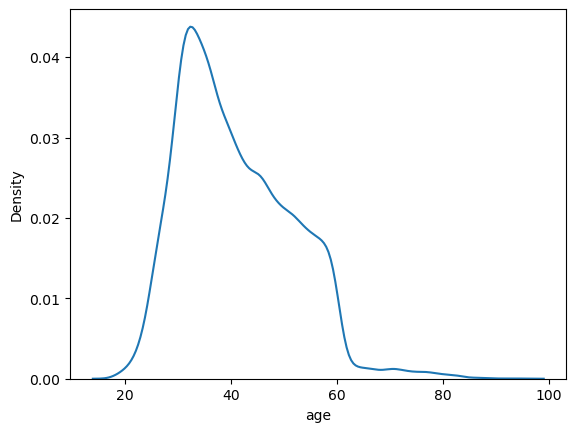

In [14]:
# check age data with kde plot
sns.kdeplot(data=df, x= 'age')

In [15]:
# check age who's custmoer age above 65 
df[df['age']>=65]

age         job   marital  education default  balance housing loan  \
41      68     retired   married    primary      no     2301      no   no   
150     69     retired   married    primary      no     2346      no   no   
383     70     retired   married    primary      no     3230      no   no   
430     70     retired   married    primary      no     7781      no   no   
488     66  management   married   tertiary      no     6251      no   no   
...    ...         ...       ...        ...     ...      ...     ...  ...   
31502   73     retired   married  secondary      no       19      no   no   
31536   77     retired   married  secondary      no     1208      no   no   
31537   72     retired   married    primary      no     2304      no   no   
31611   65  management  divorced   tertiary      no       90     yes   no   
31622   79     retired  divorced    primary      no     2787      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
41      cellular   14   aug        90         3    120         1  failure   
150     cellular   11   feb       354         2     -1         0  unknown   
383     cellular   24   nov       112         1     -1         0  unknown   
430     cellular    3   jul       222         1     -1         0  unknown   
488     cellular   10   aug       273         2    356        10    other   
...          ...  ...   ...       ...       ...    ...       ...      ...   
31502   cellular    5   nov       509         2     -1         0  unknown   
31536  telephone   28   apr        72         4     -1         0  unknown   
31537  telephone    5   may       510         4     -1         0  unknown   
31611   cellular   22   apr       416         1     -1         0  unknown   
31622  telephone   13   jul       617         1    377         1  success   

      subscribed  
41            no  
150          yes  
383           no  
430           no  
488           no  
...          ...  
31502         no  
31536         no  
31537        yes  
31611        yes  
31622        yes  

[574 rows x 17 columns]

574 data is 65 age and more than we consider this people not fixed deposite

In [16]:
df.drop(df[df['age']>=65].index,inplace=True)

<Axes: xlabel='age', ylabel='Density'>

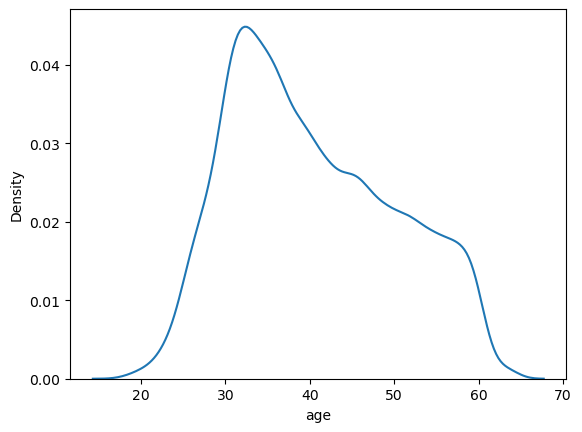

In [17]:
sns.kdeplot(data=df, x= 'age')

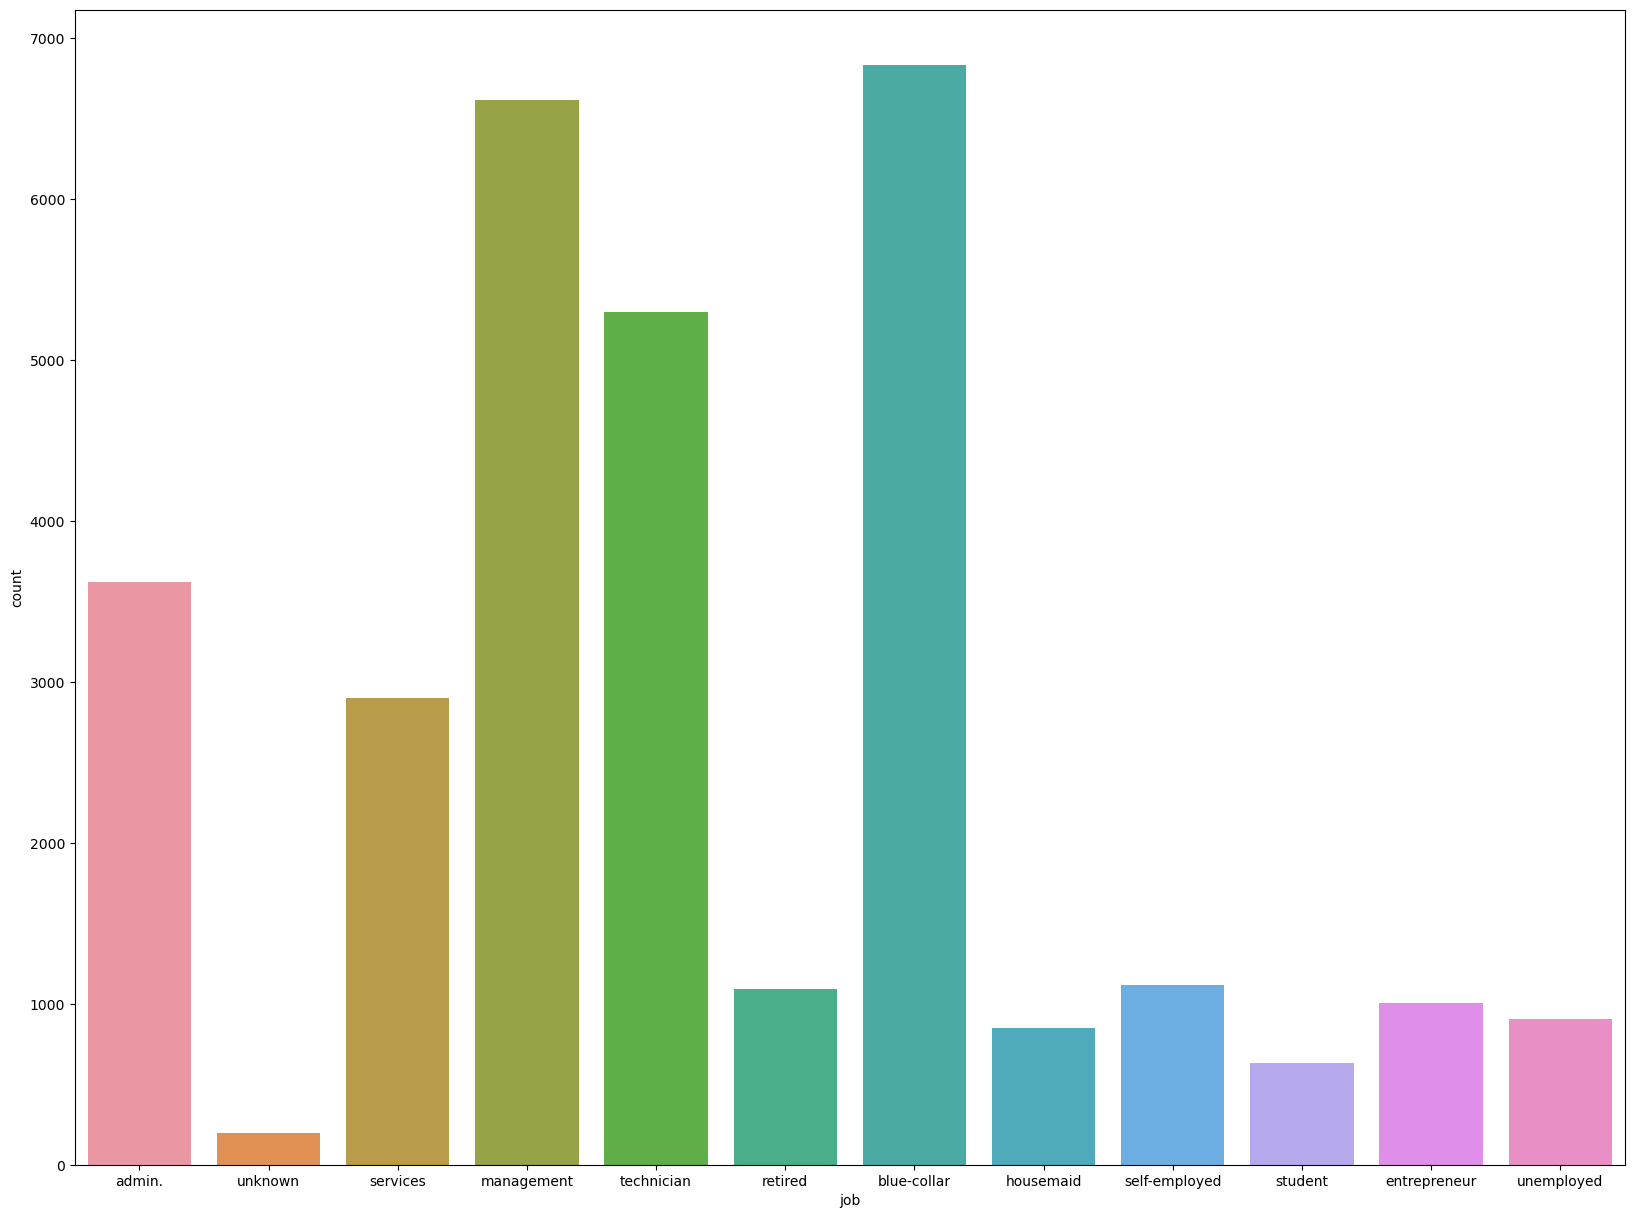

In [18]:
plt.figure(figsize=(20,15))
sns.countplot(data=df, x= 'job')
plt.show()

In [19]:
df[df['job'] == 'unknown']

age      job   marital  education default  balance housing loan  \
1       31  unknown   married  secondary      no        3      no   no   
63      39  unknown    single    unknown      no        0      no   no   
95      53  unknown   married  secondary      no       16      no   no   
317     59  unknown   married    unknown      no     1541      no   no   
349     40  unknown   married   tertiary      no      119      no   no   
...    ...      ...       ...        ...     ...      ...     ...  ...   
30596   51  unknown    single    unknown      no        0      no   no   
30636   46  unknown   married    primary      no      110      no   no   
30645   59  unknown  divorced    unknown      no       27      no   no   
31475   33  unknown    single  secondary      no        9      no   no   
31589   26  unknown    single  secondary      no     1187      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
1       cellular   20   jul        91         2     -1         0  unknown   
63     telephone   28   jan        28         1     -1         0  unknown   
95       unknown    9   jun       100         1     -1         0  unknown   
317     cellular    5   aug       790         1     -1         0  unknown   
349     cellular   19   aug       258         2     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
30596    unknown    5   jun       409         1     -1         0  unknown   
30636    unknown   19   jun       113        14     -1         0  unknown   
30645    unknown    5   may       347         3     -1         0  unknown   
31475   cellular   19   oct       238         1     -1         0  unknown   
31589    unknown   17   nov        44         1     -1         0  unknown   

      subscribed  
1             no  
63            no  
95            no  
317           no  
349           no  
...          ...  
30596         no  
30636         no  
30645         no  
31475         no  
31589         no  

[198 rows x 17 columns]

consider unknown people , unemplyoed and retried people not  subscribed fixed deposit. we drop this.

In [20]:
df.drop(df[df['job']=='unknown'].index,inplace=True)
df.drop(df[df['job']=='unemployed'].index,inplace=True)
df.drop(df[df['job']=='retired'].index,inplace=True)

In [21]:
df.shape

(28878, 17)

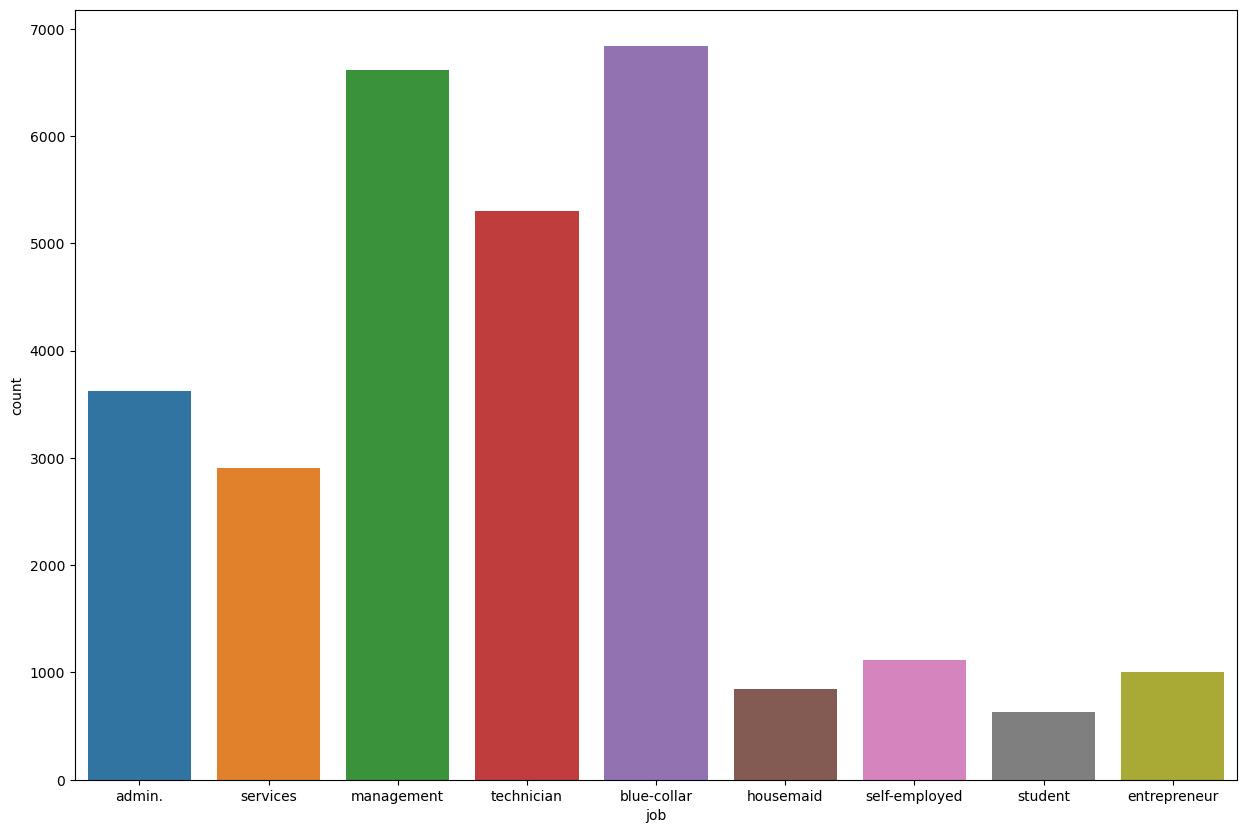

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x= 'job')
plt.show()

<Axes: xlabel='education', ylabel='count'>

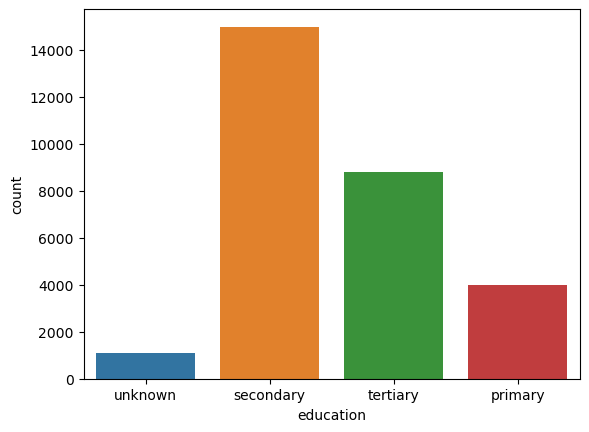

In [23]:
sns.countplot(data=df, x= 'education')

In [24]:
df[df['education'] == 'unknown']

age          job  marital education default  balance housing loan  \
0       56       admin.  married   unknown      no     1933      no   no   
46      27   technician   single   unknown      no        0     yes   no   
61      40       admin.  married   unknown      no     9110     yes   no   
107     48  blue-collar  married   unknown      no      100     yes   no   
119     50   technician  married   unknown      no      680      no   no   
...    ...          ...      ...       ...     ...      ...     ...  ...   
31527   56       admin.  married   unknown      no      681      no   no   
31543   47  blue-collar  married   unknown      no     1660      no   no   
31563   30       admin.  married   unknown      no        4     yes   no   
31577   48     services  married   unknown      no     1705     yes   no   
31582   47     services  married   unknown      no    12839     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0      telephone   19   nov        44         2     -1         0  unknown   
46      cellular    2   feb       168         1     -1         0  unknown   
61     telephone   19   nov        89         3     -1         0  unknown   
107      unknown   29   may       206         1     -1         0  unknown   
119     cellular    7   jul       457         5     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
31527   cellular   13   aug       900         2     -1         0  unknown   
31543   cellular    7   aug       187         2     -1         0  unknown   
31563   cellular   29   jul       176        21     -1         0  unknown   
31577    unknown    5   may       107         1     -1         0  unknown   
31582   cellular    7   may        50         1    171         4  failure   

      subscribed  
0             no  
46            no  
61            no  
107           no  
119           no  
...          ...  
31527         no  
31543         no  
31563         no  
31577         no  
31582         no  

[1106 rows x 17 columns]

In [25]:
df.drop(df[df['education'] == 'unknown'].index,inplace=True)

In [26]:
df.shape

(27772, 17)

<Axes: xlabel='education', ylabel='count'>

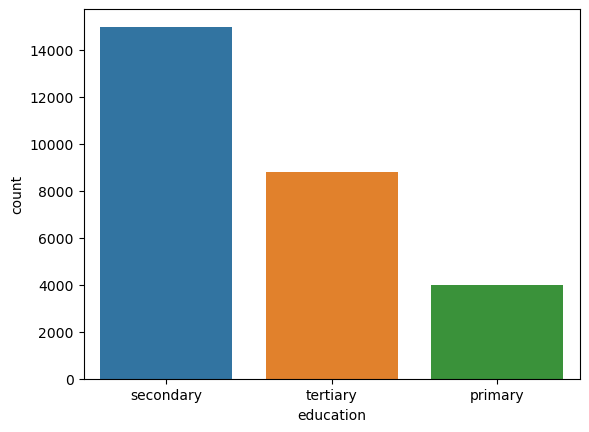

In [27]:
sns.countplot(data=df, x= 'education')

<Axes: xlabel='marital', ylabel='count'>

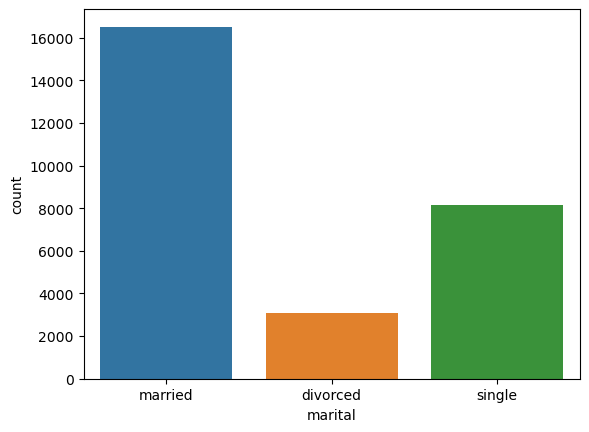

In [28]:
sns.countplot(data = df , x = 'marital')

<Axes: xlabel='default', ylabel='count'>

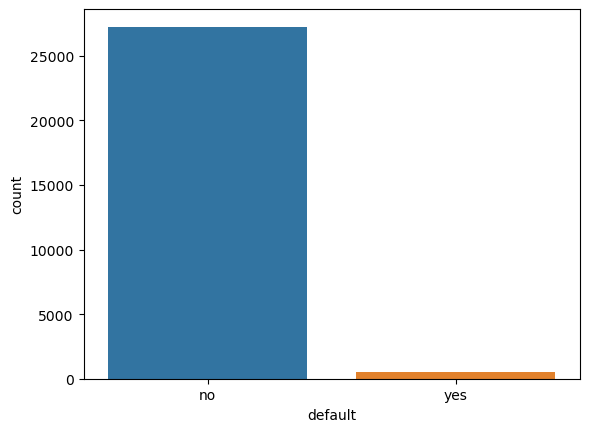

In [29]:
sns.countplot(data=df, x= 'default')

<Axes: xlabel='balance', ylabel='Density'>

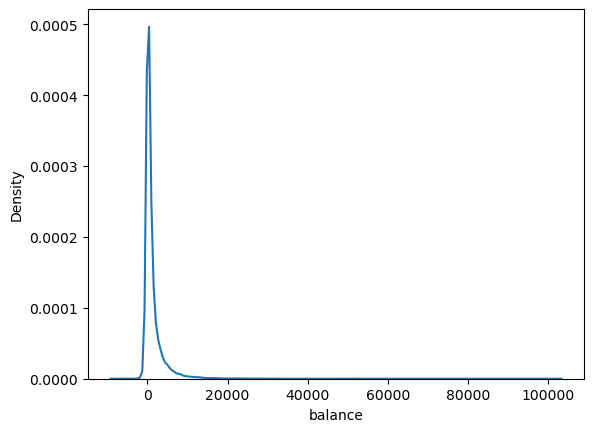

In [30]:
sns.kdeplot(data=df,x='balance')

consider who have 0 and less than 0 not subscribed fixed deposit

In [31]:
# drop the balance data whos less than and 0 balance 
df.drop(df[df['balance'] <=0].index,inplace=True)

In [32]:
df

age          job   marital  education default  balance housing loan  \
2       27     services   married  secondary      no      891     yes   no   
3       57   management  divorced   tertiary      no     3287      no   no   
4       31   technician   married  secondary      no      119     yes   no   
7       50   technician    single  secondary      no     1811      no   no   
8       45  blue-collar  divorced  secondary      no     1951     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
31641   37   technician    single   tertiary      no     1309      no   no   
31643   53   management  divorced   tertiary      no      380      no  yes   
31644   32   management    single   tertiary      no      312      no   no   
31645   57   technician   married  secondary      no      225     yes   no   
31646   55   management  divorced  secondary      no      204     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
2       cellular   18   jul       240         1     -1         0  unknown   
3       cellular   22   jun       867         1     84         3  success   
4       cellular    4   feb       380         1     -1         0  unknown   
7       cellular    8   jun        97         4     -1         0  unknown   
8       cellular    4   feb       692         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
31641    unknown    6   jun       442         2     -1         0  unknown   
31643   cellular    5   jun       438         2     -1         0  unknown   
31644   cellular    7   aug        37         3     -1         0  unknown   
31645  telephone   15   may        22         7    337        12  failure   
31646   cellular   11   jul      1973         2     -1         0  unknown   

      subscribed  
2             no  
3            yes  
4             no  
7             no  
8             no  
...          ...  
31641         no  
31643        yes  
31644         no  
31645         no  
31646        yes  

[23144 rows x 17 columns]

<Axes: xlabel='housing', ylabel='count'>

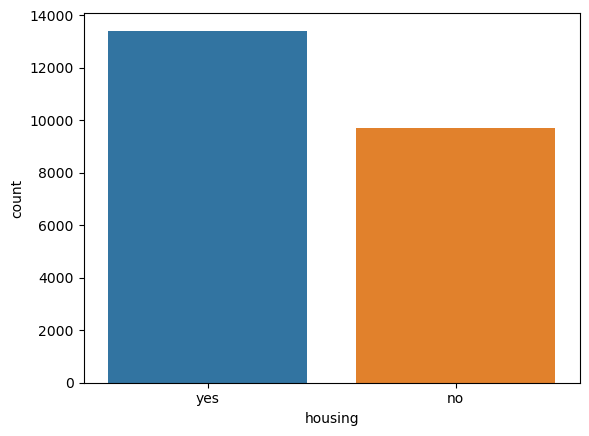

In [33]:
sns.countplot(data=df, x = 'housing')

<Axes: xlabel='loan', ylabel='count'>

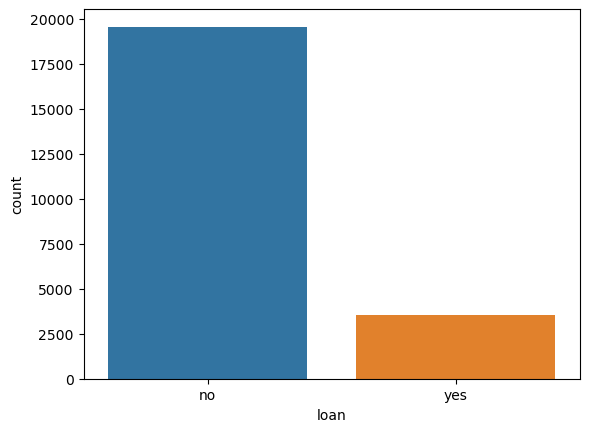

In [34]:
sns.countplot(data=df, x = 'loan')

<Axes: xlabel='contact', ylabel='count'>

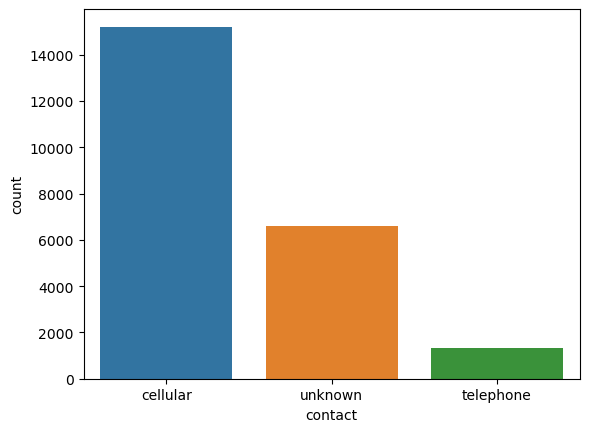

In [35]:
sns.countplot(data=df, x = 'contact')

In [36]:
df[df['contact'] == 'unknown']

age          job  marital  education default  balance housing loan  \
13      39   management   single  secondary      no     1877     yes   no   
14      43  blue-collar  married  secondary      no      960     yes   no   
15      41     services   single  secondary      no      260      no   no   
16      53   technician  married  secondary      no      719     yes   no   
20      60   management  married   tertiary      no      328     yes   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
31633   50   technician  married   tertiary      no     3117      no   no   
31634   30   technician   single   tertiary      no      432     yes  yes   
31639   38     services   single  secondary      no      570     yes   no   
31640   43   management   single  secondary      no     2968      no   no   
31641   37   technician   single   tertiary      no     1309      no   no   

       contact  day month  duration  campaign  pdays  previous poutcome  \
13     unknown    6   may       185         1     -1         0  unknown   
14     unknown   15   may       436         1     -1         0  unknown   
15     unknown    6   jun        75         1     -1         0  unknown   
16     unknown   14   may       230         1     -1         0  unknown   
20     unknown   20   may        72         5     -1         0  unknown   
...        ...  ...   ...       ...       ...    ...       ...      ...   
31633  unknown    9   jun       174         1     -1         0  unknown   
31634  unknown    3   jun       180         3     -1         0  unknown   
31639  unknown    5   may        75         2     -1         0  unknown   
31640  unknown   20   jun        30         4     -1         0  unknown   
31641  unknown    6   jun       442         2     -1         0  unknown   

      subscribed  
13            no  
14            no  
15            no  
16            no  
20            no  
...          ...  
31633         no  
31634         no  
31639         no  
31640         no  
31641         no  

[6613 rows x 17 columns]

unknown contact replaced with nan and then fill nan with mode method 

In [37]:
for i in df['contact']:
    if i== 'unknown':
        df['contact'].replace(i, np.nan,inplace=True)

In [38]:
df['contact'].fillna(df['contact'].mode()[0],inplace=True)

In [39]:
df['contact'].isnull().sum()

0

<Axes: xlabel='contact', ylabel='count'>

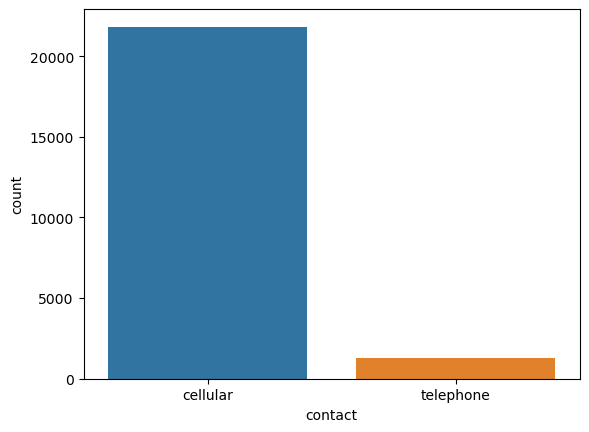

In [40]:
sns.countplot(data=df, x = 'contact')

<Axes: xlabel='day', ylabel='count'>

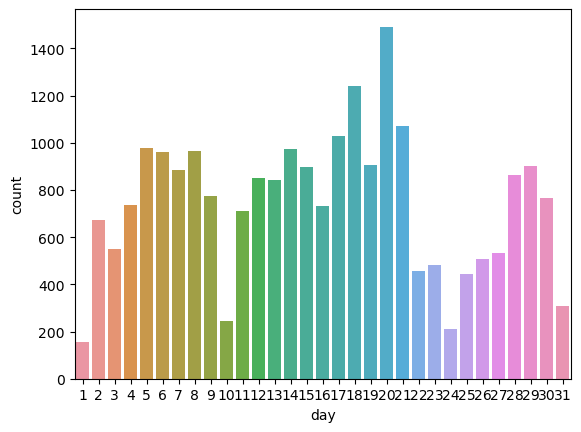

In [41]:
sns.countplot(data = df , x= 'day')

<Axes: xlabel='month', ylabel='count'>

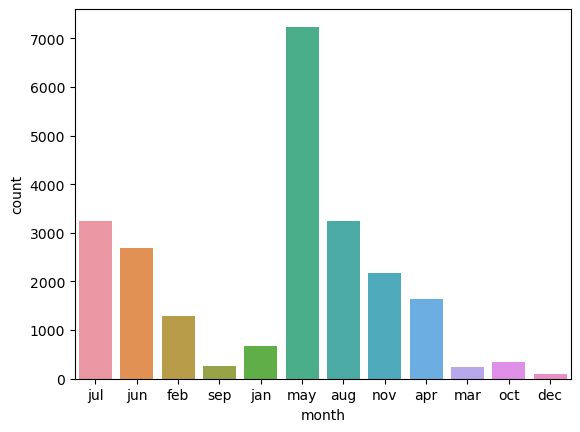

In [42]:
sns.countplot(data=df, x= 'month')

<Axes: xlabel='duration', ylabel='Density'>

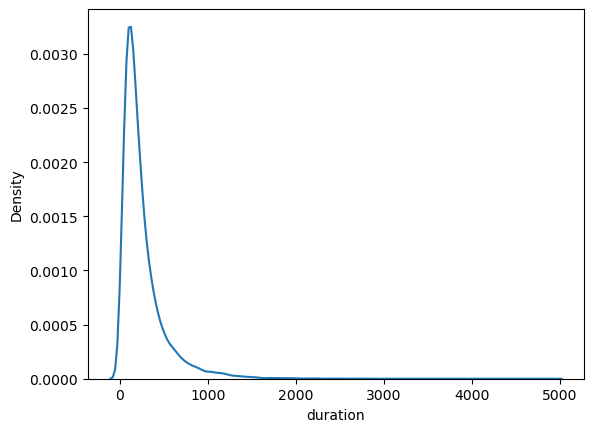

In [43]:
sns.kdeplot(data=df,x='duration')

<Axes: xlabel='campaign', ylabel='Density'>

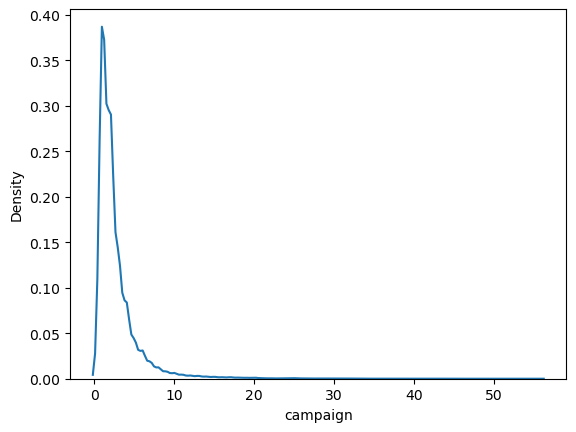

In [44]:
sns.kdeplot(data=df,x='campaign')

<Axes: xlabel='pdays', ylabel='Density'>

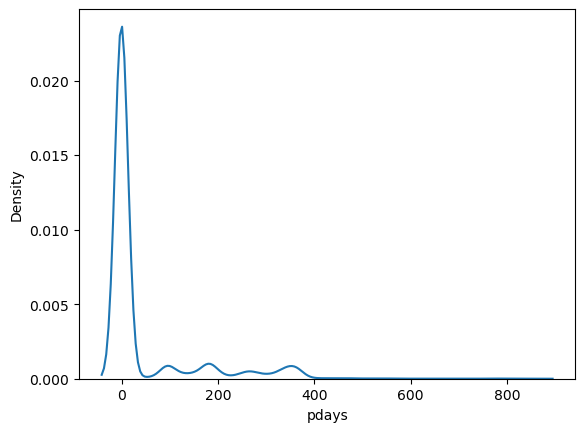

In [45]:
sns.kdeplot(data=df,x= 'pdays')

<Axes: xlabel='previous', ylabel='Density'>

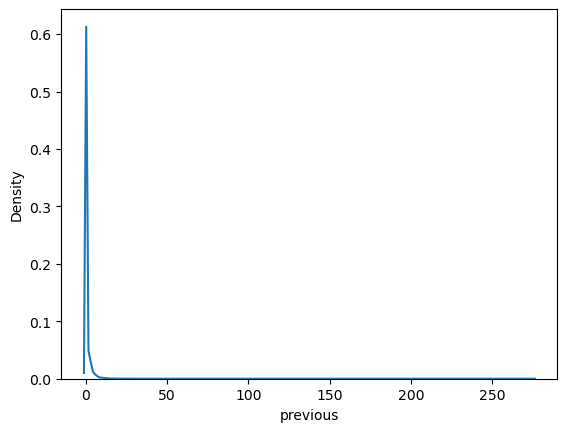

In [46]:
sns.kdeplot(data=df,x='previous')

<Axes: xlabel='poutcome', ylabel='count'>

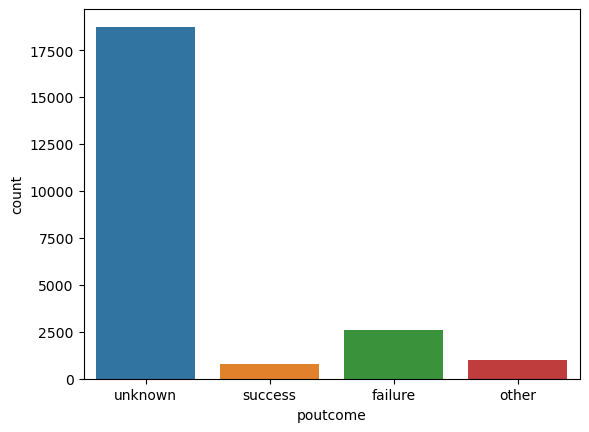

In [47]:
sns.countplot(data=df,x='poutcome')

In [48]:
for i in df['poutcome']:
    if i== 'unknown':
        df['poutcome'].replace(i, np.nan,inplace=True)   

In [49]:
df['poutcome'].isnull().sum()

18747

In [50]:
df['poutcome'].fillna(df['poutcome'].mode()[0],inplace=True)

<Axes: xlabel='poutcome', ylabel='count'>

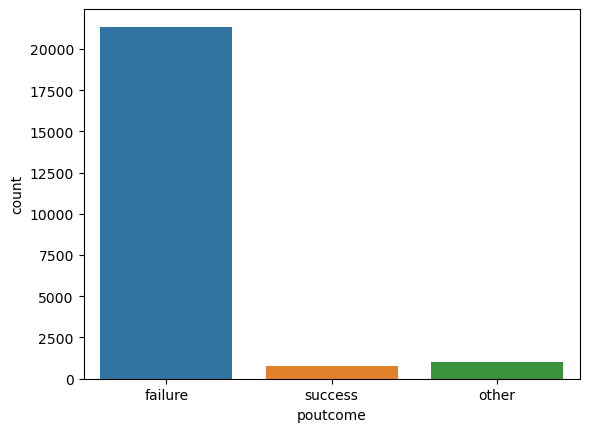

In [51]:
sns.countplot(data=df,x='poutcome')

<Axes: xlabel='subscribed', ylabel='count'>

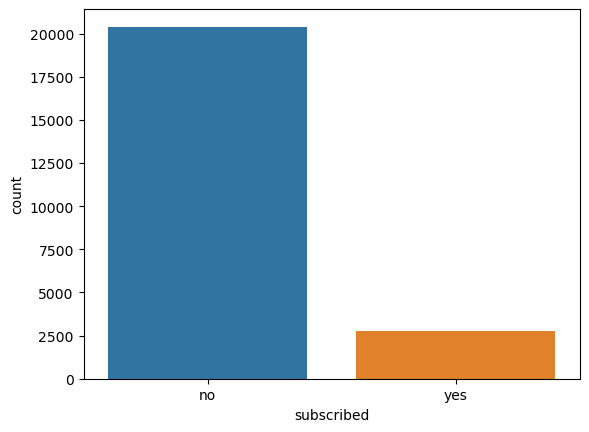

In [52]:
sns.countplot(data=df,x='subscribed')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23144 entries, 2 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         23144 non-null  int64 
 1   job         23144 non-null  object
 2   marital     23144 non-null  object
 3   education   23144 non-null  object
 4   default     23144 non-null  object
 5   balance     23144 non-null  int64 
 6   housing     23144 non-null  object
 7   loan        23144 non-null  object
 8   contact     23144 non-null  object
 9   day         23144 non-null  int64 
 10  month       23144 non-null  object
 11  duration    23144 non-null  int64 
 12  campaign    23144 non-null  int64 
 13  pdays       23144 non-null  int64 
 14  previous    23144 non-null  int64 
 15  poutcome    23144 non-null  object
 16  subscribed  23144 non-null  object
dtypes: int64(7), object(10)
memory usage: 3.2+ MB


In [54]:
for i in df:
    x = df[i].value_counts()
    print(x)

32    1182
33    1124
31    1123
34    1032
35    1010
30     993
36     972
37     928
39     831
38     746
40     734
41     688
29     682
42     646
45     630
46     597
28     595
43     593
44     577
47     545
49     537
48     510
27     498
50     495
52     480
51     470
26     450
53     417
54     405
55     381
56     355
57     342
58     296
25     294
59     267
60     208
24     156
23     117
22      69
61      50
21      39
20      22
62      17
19      16
64      11
63      11
18       3
Name: age, dtype: int64
management       5479
blue-collar      5325
technician       4266
admin.           2923
services         2259
self-employed     938
entrepreneur      779
housemaid         690
student           485
Name: job, dtype: int64
married     13637
single       7039
divorced     2468
Name: marital, dtype: int64
secondary    12261
tertiary      7556
primary       3327
Name: education, dtype: int64
no     22987
yes      157
Name: default, dtype: int64
1        123
2

In [55]:
# convert object datype to numric datatpe using LabelEncoder 
from sklearn.preprocessing import LabelEncoder
df['job'] = LabelEncoder().fit_transform(df['job'])
df['marital'] = LabelEncoder().fit_transform(df['marital'])
df['education'] = LabelEncoder().fit_transform(df['education'])
df['default'] = LabelEncoder().fit_transform(df['default'])
df['housing'] = LabelEncoder().fit_transform(df['housing'])
df['loan'] = LabelEncoder().fit_transform(df['loan'])
df['contact'] = LabelEncoder().fit_transform(df['contact'])
df['month'] = LabelEncoder().fit_transform(df['month'])
df['poutcome'] = LabelEncoder().fit_transform(df['poutcome'])
df['subscribed'] = LabelEncoder().fit_transform(df['subscribed'])

In [56]:
df.shape

(23144, 17)

In [57]:
df

age  job  marital  education  default  balance  housing  loan  contact  \
2       27    6        1          1        0      891        1     0        0   
3       57    4        0          2        0     3287        0     0        0   
4       31    8        1          1        0      119        1     0        0   
7       50    8        2          1        0     1811        0     0        0   
8       45    1        0          1        0     1951        1     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
31641   37    8        2          2        0     1309        0     0        0   
31643   53    4        0          2        0      380        0     1        0   
31644   32    4        2          2        0      312        0     0        0   
31645   57    8        1          1        0      225        1     0        1   
31646   55    4        0          1        0      204        1     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  subscribed  
2       18      5       240         1     -1         0         0           0  
3       22      6       867         1     84         3         2           1  
4        4      3       380         1     -1         0         0           0  
7        8      6        97         4     -1         0         0           0  
8        4      3       692         1     -1         0         0           0  
...    ...    ...       ...       ...    ...       ...       ...         ...  
31641    6      6       442         2     -1         0         0           0  
31643    5      6       438         2     -1         0         0           1  
31644    7      1        37         3     -1         0         0           0  
31645   15      8        22         7    337        12         0           0  
31646   11      5      1973         2     -1         0         0           1  

[23144 rows x 17 columns]

In [58]:
df.describe()

age           job       marital     education       default  \
count  23144.000000  23144.000000  23144.000000  23144.000000  23144.000000   
mean      39.545239      3.743346      1.197503      1.182726      0.006784   
std        9.335995      2.785521      0.609742      0.660954      0.082085   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       32.000000      1.000000      1.000000      1.000000      0.000000   
50%       38.000000      4.000000      1.000000      1.000000      0.000000   
75%       47.000000      6.000000      2.000000      2.000000      0.000000   
max       64.000000      8.000000      2.000000      2.000000      1.000000   

             balance       housing          loan       contact           day  \
count   23144.000000  23144.000000  23144.000000  23144.000000  23144.000000   
mean     1605.340607      0.579805      0.154165      0.056861     15.772122   
std      3137.159694      0.493601      0.361115      0.231583      8.232351   
min         1.000000      0.000000      0.000000      0.000000      1.000000   
25%       223.000000      0.000000      0.000000      0.000000      8.000000   
50%       623.000000      1.000000      0.000000      0.000000     16.000000   
75%      1697.000000      1.000000      0.000000      0.000000     21.000000   
max    102127.000000      1.000000      1.000000      1.000000     31.000000   

              month      duration      campaign         pdays      previous  \
count  23144.000000  23144.000000  23144.000000  23144.000000  23144.000000   
mean       5.519832    257.481334      2.749525     41.892326      0.614025   
std        3.047769    259.026890      2.986763    102.019903      2.660767   
min        0.000000      0.000000      1.000000     -1.000000      0.000000   
25%        3.000000    103.000000      1.000000     -1.000000      0.000000   
50%        6.000000    180.000000      2.000000     -1.000000      0.000000   
75%        8.000000    317.000000      3.000000     -1.000000      0.000000   
max       11.000000   4918.000000     55.000000    854.000000    275.000000   

           poutcome    subscribed  
count  23144.000000  23144.000000  
mean       0.112081      0.118346  
std        0.410365      0.323024  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        2.000000      1.000000

1)age feature right skewness 

2)balance feature is more skewness and more difreance in max and 75% outlier present in balance

3)duration is right skewness and diffrance in max and 75% outlier present 

4)campaign is right skewness and difrance in max and 75% outlier present 

5)pdays is min ,q1,q2,q3 is negative and max is difrance 

6)previous is min,q1,q2,q3 is zero value 

In [59]:
df.drop(df[df['duration']<=0].index,inplace=True)

In [60]:
df.describe()

age           job       marital     education       default  \
count  23143.000000  23143.000000  23143.000000  23143.000000  23143.000000   
mean      39.544657      3.743335      1.197511      1.182777      0.006784   
std        9.335778      2.785581      0.609753      0.660922      0.082086   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       32.000000      1.000000      1.000000      1.000000      0.000000   
50%       38.000000      4.000000      1.000000      1.000000      0.000000   
75%       47.000000      6.000000      2.000000      2.000000      0.000000   
max       64.000000      8.000000      2.000000      2.000000      1.000000   

             balance       housing          loan       contact           day  \
count   23143.000000  23143.000000  23143.000000  23143.000000  23143.000000   
mean     1605.394806      0.579787      0.154172      0.056864     15.771637   
std      3137.216638      0.493604      0.361121      0.231587      8.232198   
min         1.000000      0.000000      0.000000      0.000000      1.000000   
25%       223.000000      0.000000      0.000000      0.000000      8.000000   
50%       623.000000      1.000000      0.000000      0.000000     16.000000   
75%      1697.000000      1.000000      0.000000      0.000000     21.000000   
max    102127.000000      1.000000      1.000000      1.000000     31.000000   

              month      duration      campaign         pdays      previous  \
count  23143.000000  23143.000000  23143.000000  23143.000000  23143.000000   
mean       5.519725    257.492460      2.749471     41.894180      0.614052   
std        3.047791    259.026957      2.986816    102.021718      2.660822   
min        0.000000      2.000000      1.000000     -1.000000      0.000000   
25%        3.000000    103.000000      1.000000     -1.000000      0.000000   
50%        6.000000    180.000000      2.000000     -1.000000      0.000000   
75%        8.000000    317.000000      3.000000     -1.000000      0.000000   
max       11.000000   4918.000000     55.000000    854.000000    275.000000   

           poutcome    subscribed  
count  23143.000000  23143.000000  
mean       0.112086      0.118351  
std        0.410373      0.323030  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        2.000000      1.000000

In [61]:
df.shape

(23143, 17)

In [62]:
df.skew()

age            0.407258
job            0.211969
marital       -0.134499
education     -0.217690
default       12.018036
balance        7.772502
housing       -0.323310
loan           1.915467
contact        3.827278
day            0.086384
month         -0.500326
duration       3.363470
campaign       4.597253
pdays          2.559552
previous      50.363653
poutcome       3.772499
subscribed     2.363133
dtype: float64

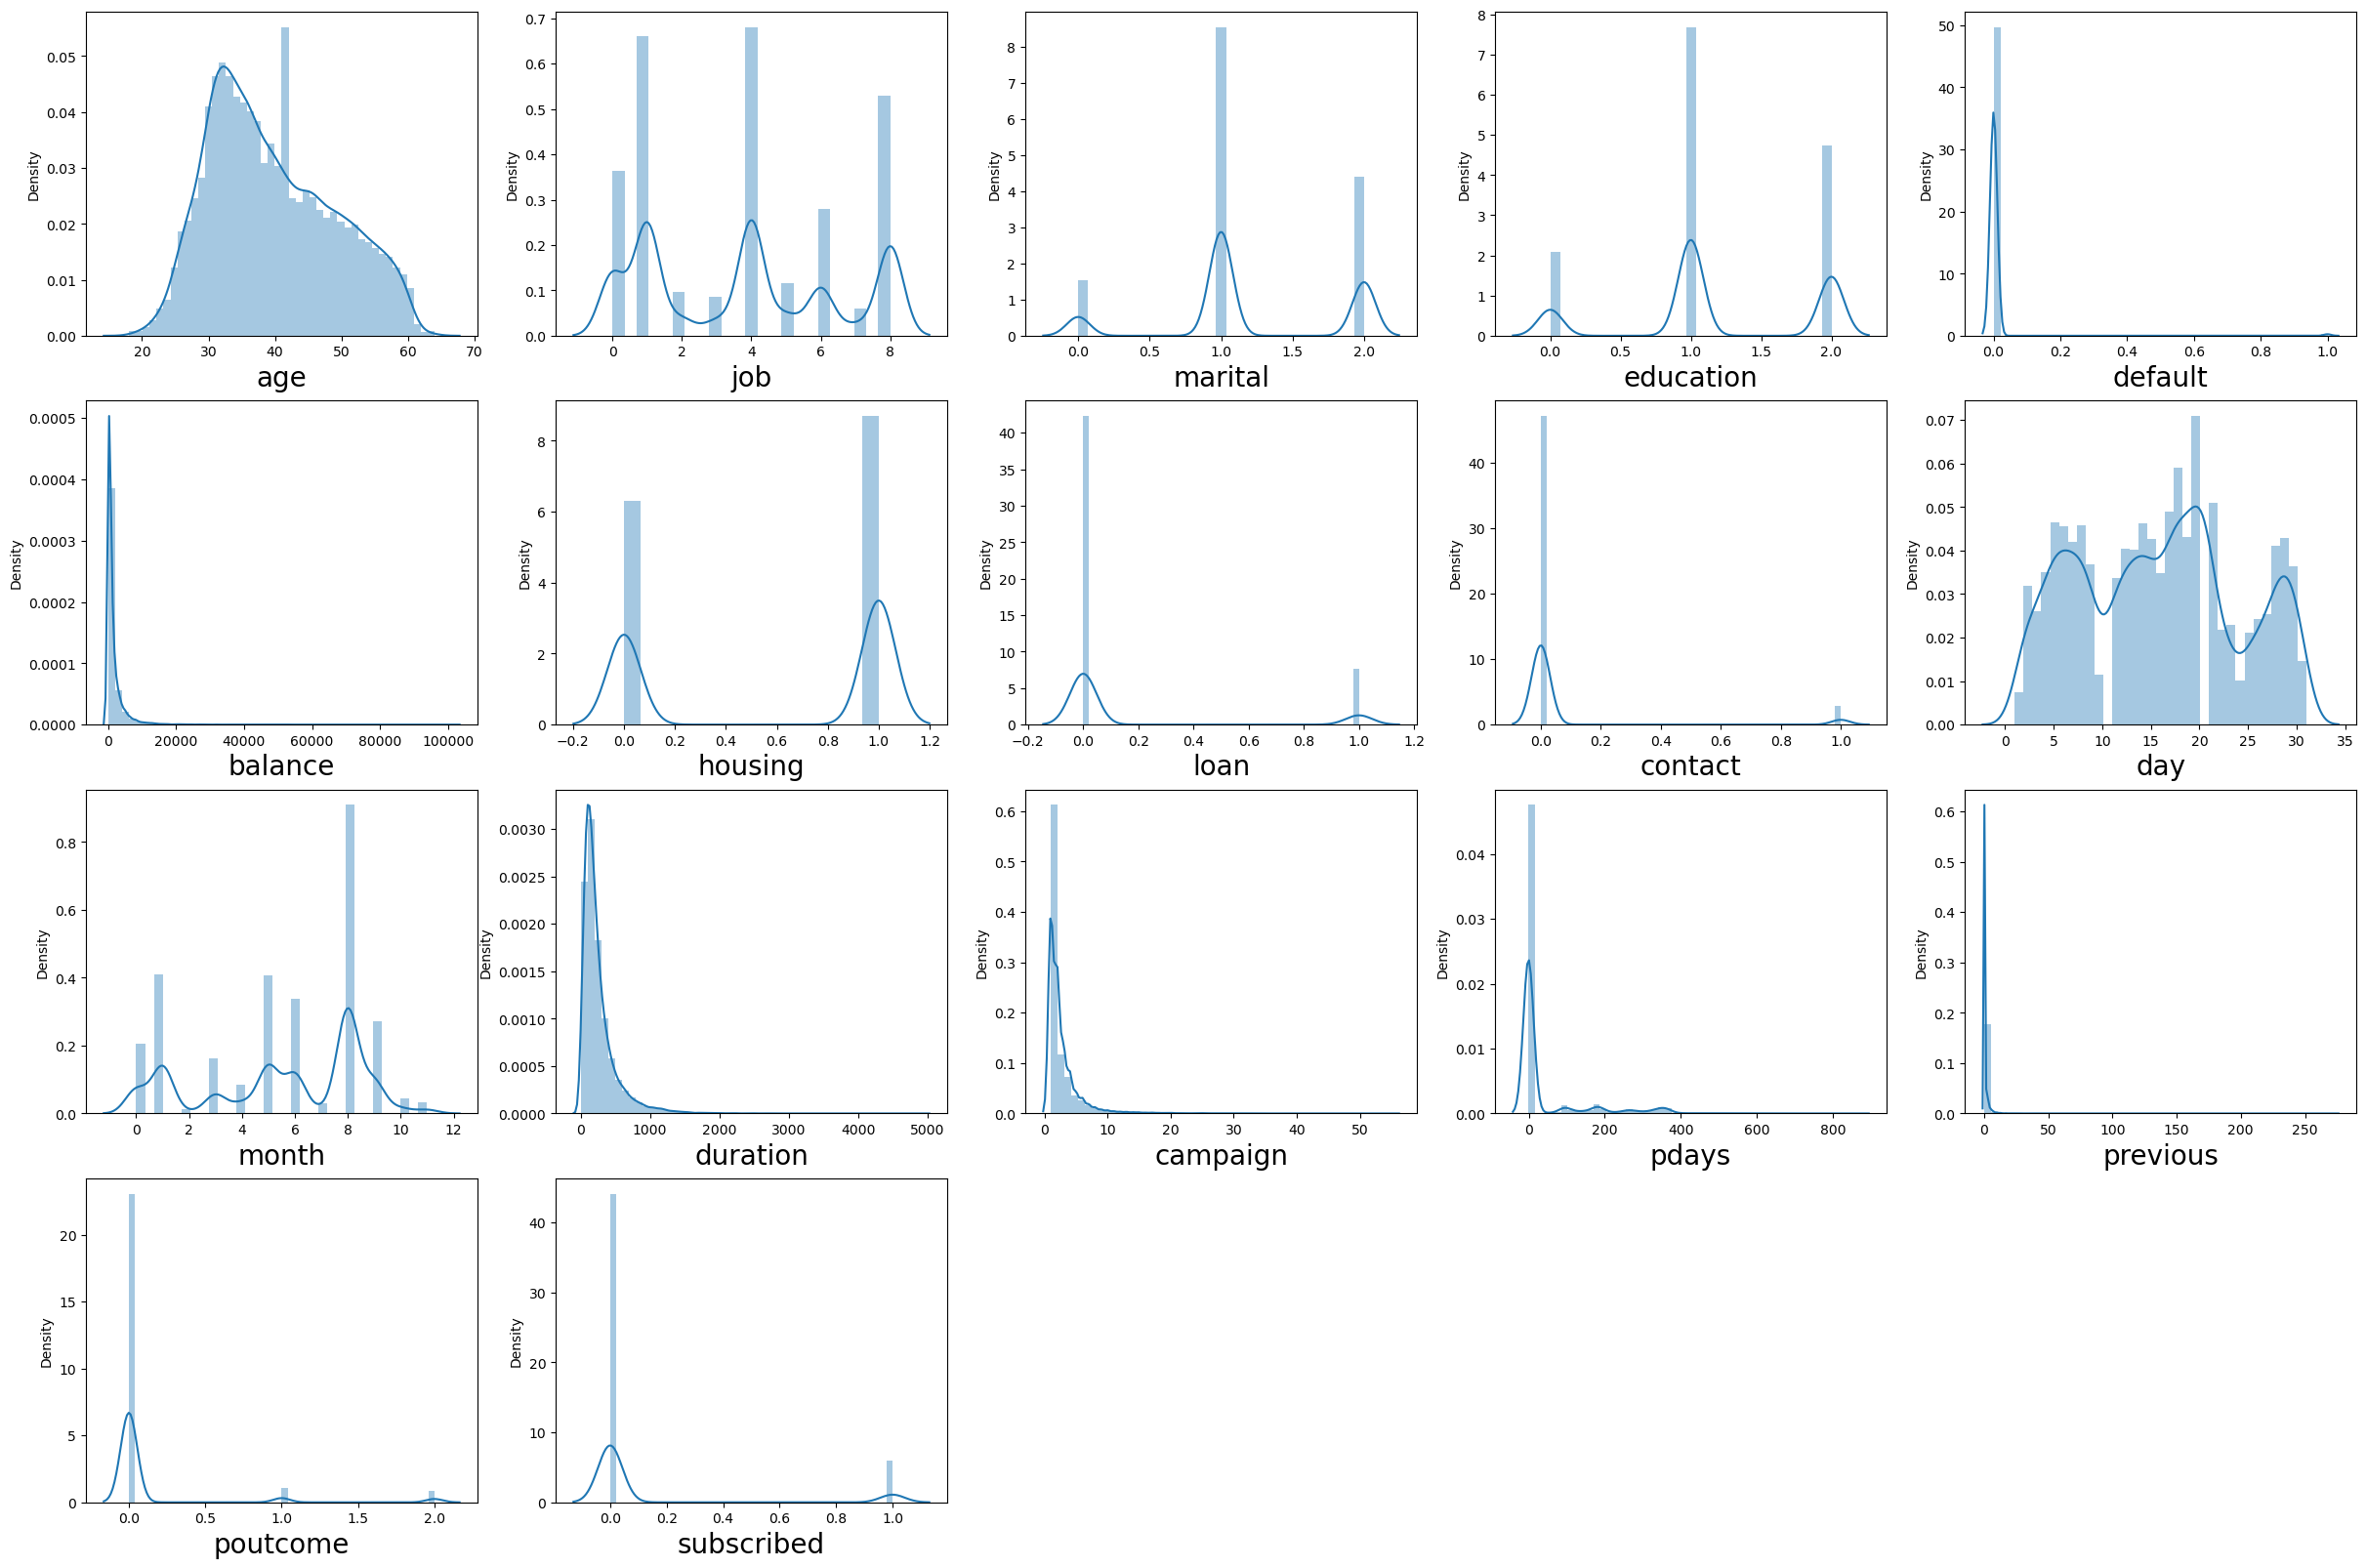

In [63]:
plt.figure(figsize=(30,25))
plotnumber = 1

for i in df:
    if plotnumber<=18:
        plt.subplot(5,5,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()    

In [64]:
continous_data = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]

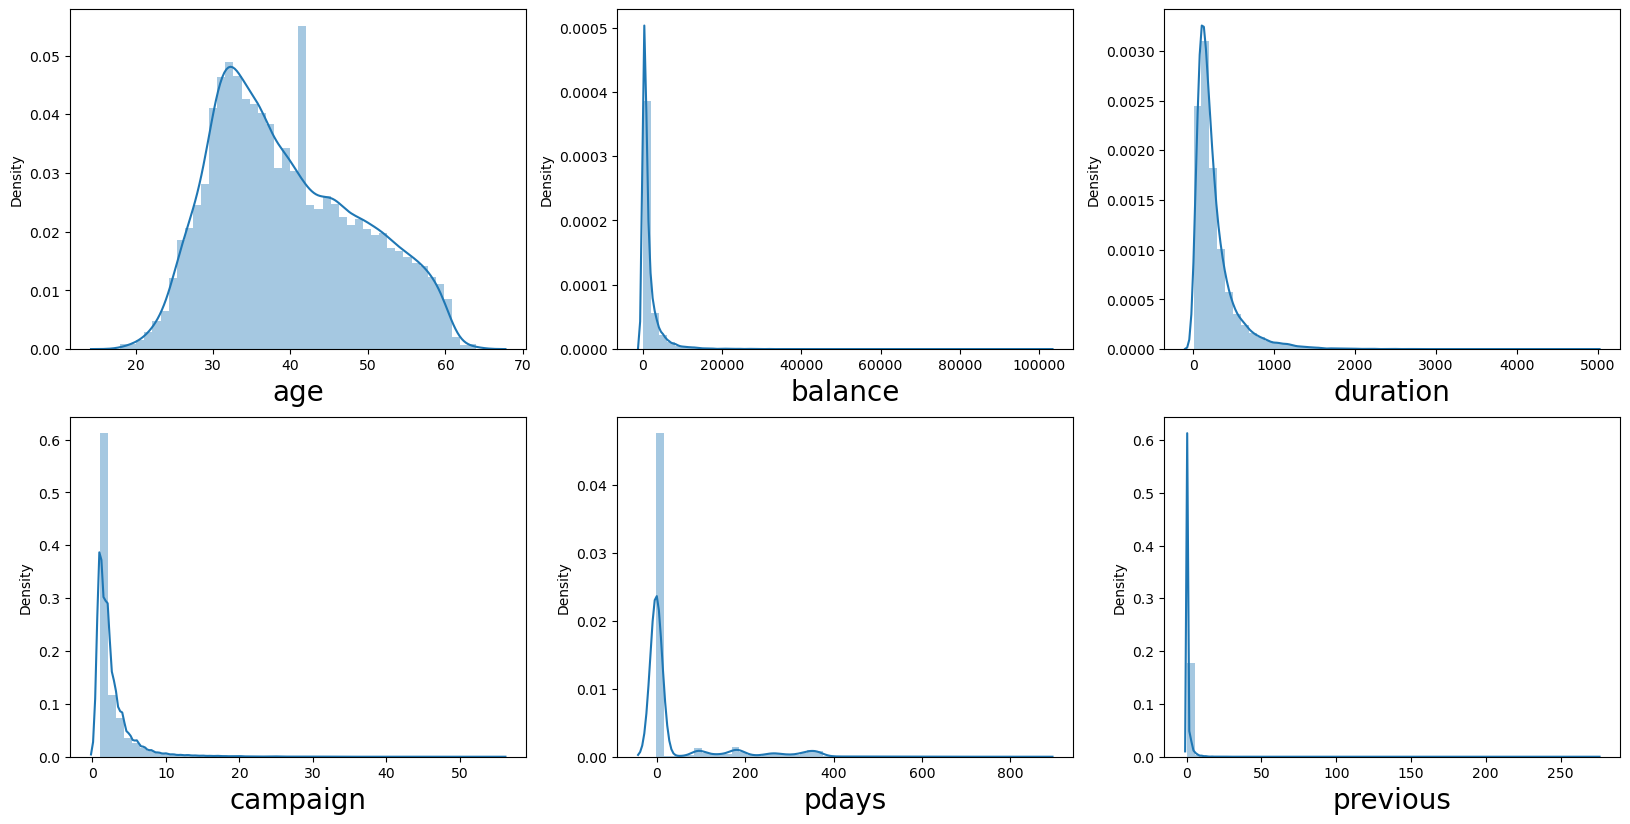

In [65]:
plt.figure(figsize=(20,15))
plotnumber = 1
 
for i in continous_data:
    if plotnumber<=6:
        plt.subplot(3,3,plotnumber)
        sns.distplot(continous_data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

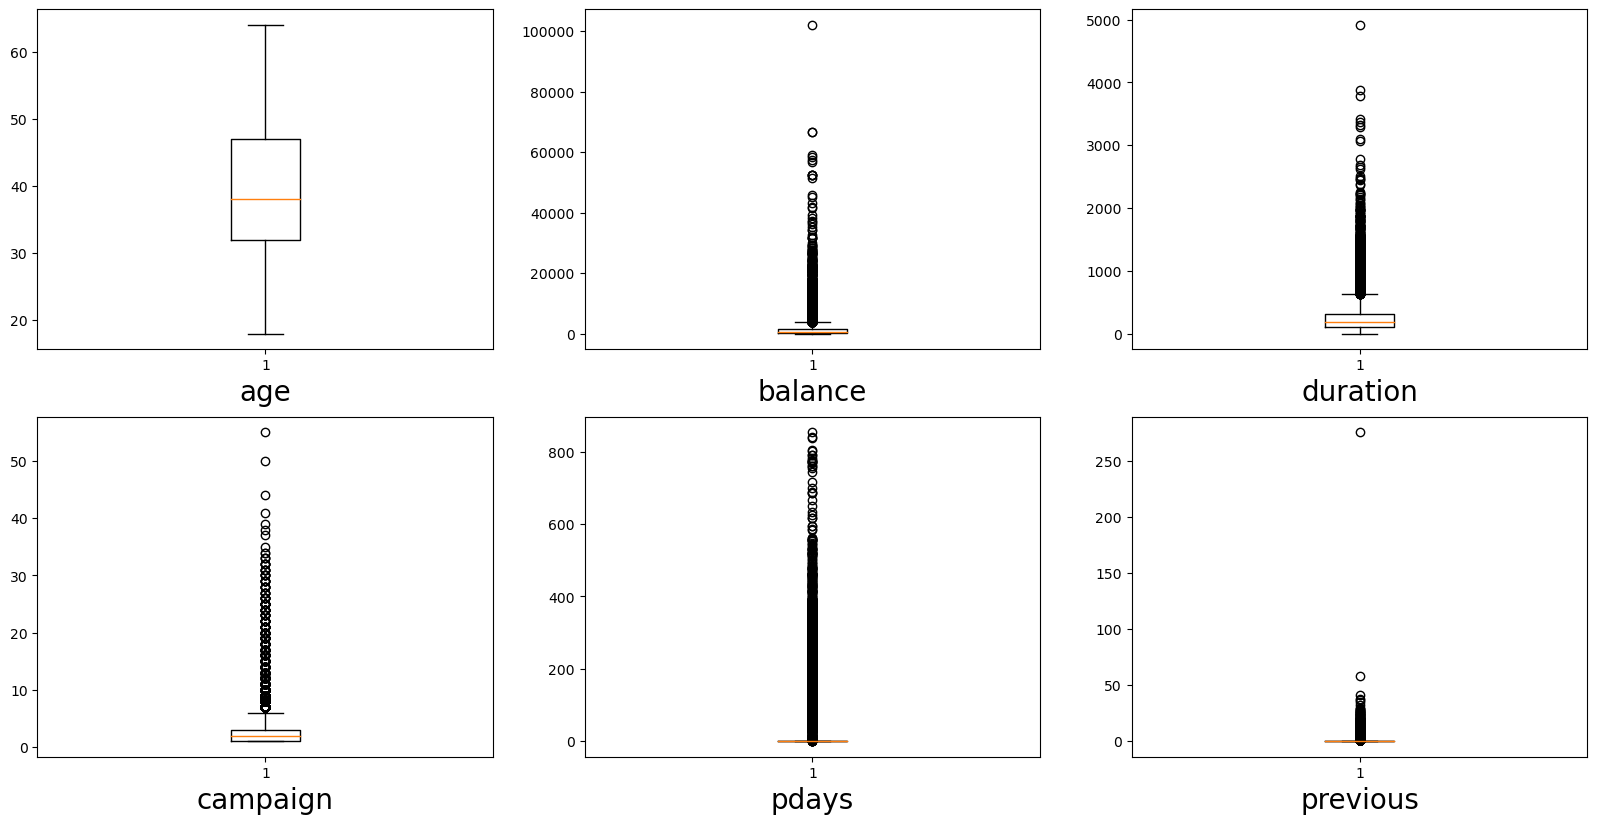

In [67]:
plt.figure(figsize=(20,15))
plotnumber = 1
 
for i in continous_data:
    if plotnumber<=6:
        plt.subplot(3,3,plotnumber)
        plt.boxplot(continous_data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

In [68]:
# we keep outlier usning powertransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [69]:
df['balance'] = pt.fit_transform(df[['balance']])
df['duration'] = pt.fit_transform(df[['duration']])
df['campaign'] = pt.fit_transform(df[['campaign']])
df['pdays'] = pt.fit_transform(df[['pdays']])

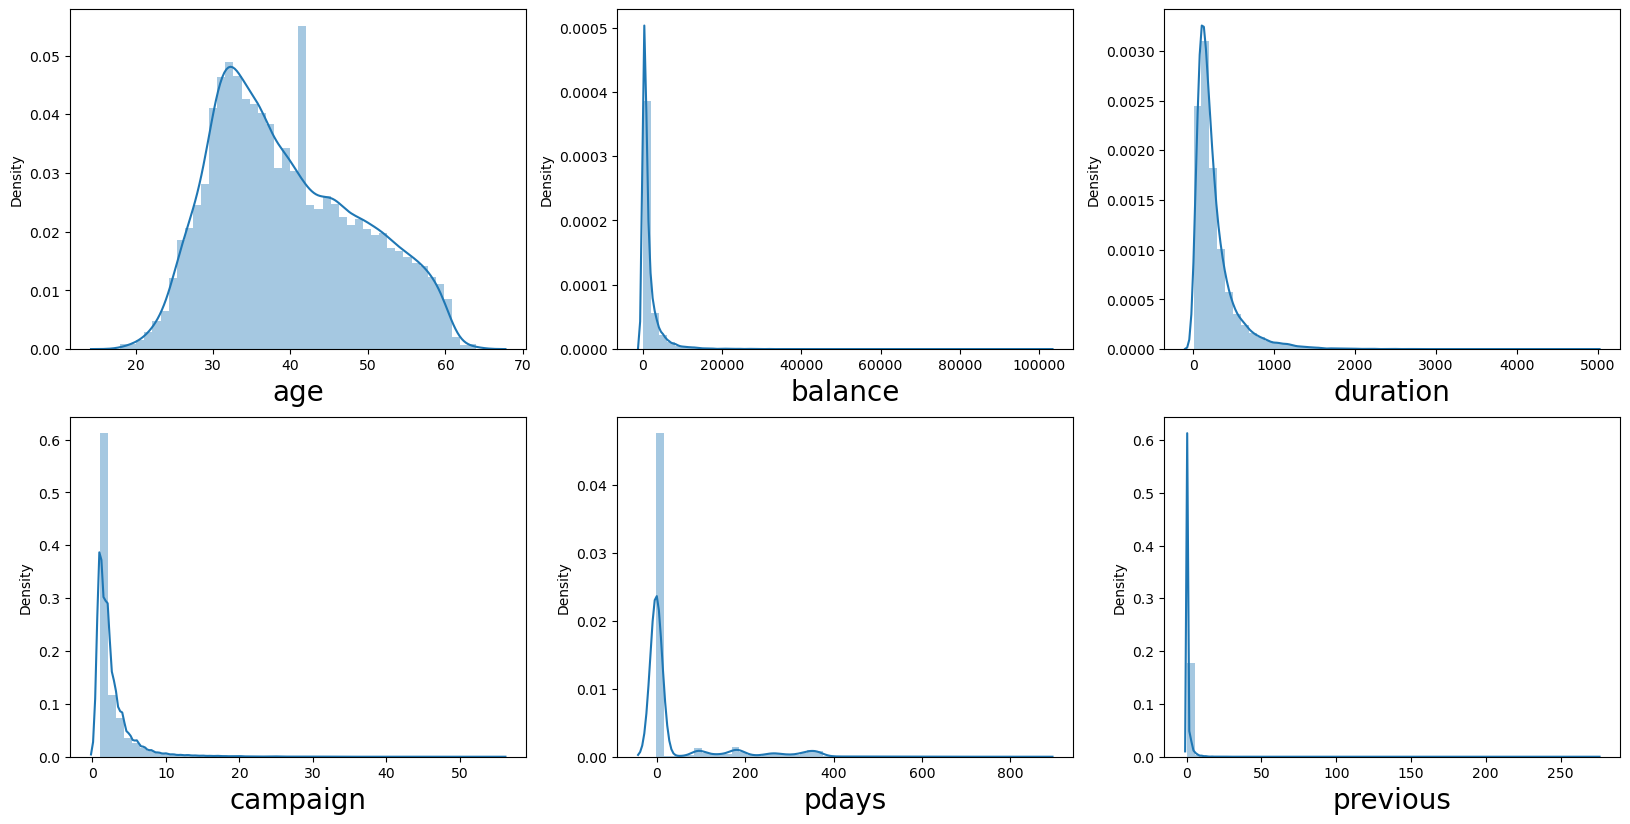

In [70]:
plt.figure(figsize=(20,15))
plotnumber = 1
 
for i in continous_data:
    if plotnumber<=6:
        plt.subplot(3,3,plotnumber)
        sns.distplot(continous_data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

In [71]:
x = df.drop('subscribed',axis=1)
y = df['subscribed']

day, month, default and contact is not best feature and also less contribute

In [73]:
# check correlation with label and feature 
x.corrwith(y)

age         -0.047354
job          0.038178
marital      0.067573
education    0.091762
default     -0.013984
balance      0.064587
housing     -0.137951
loan        -0.067150
contact     -0.009098
day         -0.029810
month       -0.027367
duration     0.359313
campaign    -0.080697
pdays        0.158175
previous     0.077628
poutcome     0.279029
dtype: float64

age, default, housing, loan, contact, day, month  and compaign is negative correlated with label 

job, marital, education, balance, duration, pdays, previous and poutcome is possitive correlated with label

also check by graph

<Axes: >

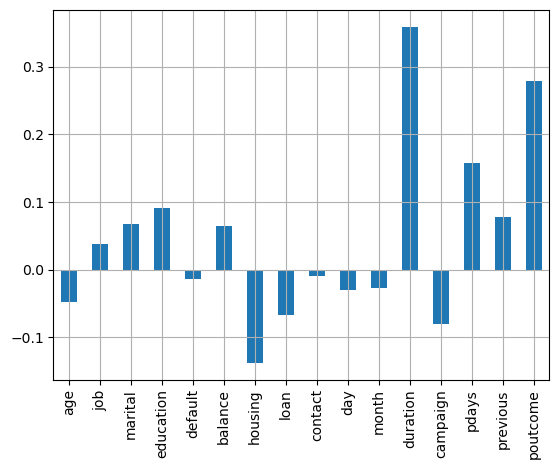

In [74]:
x.corrwith(y).plot(kind='bar',grid=True)

contact,day,month and default is less contribute to label

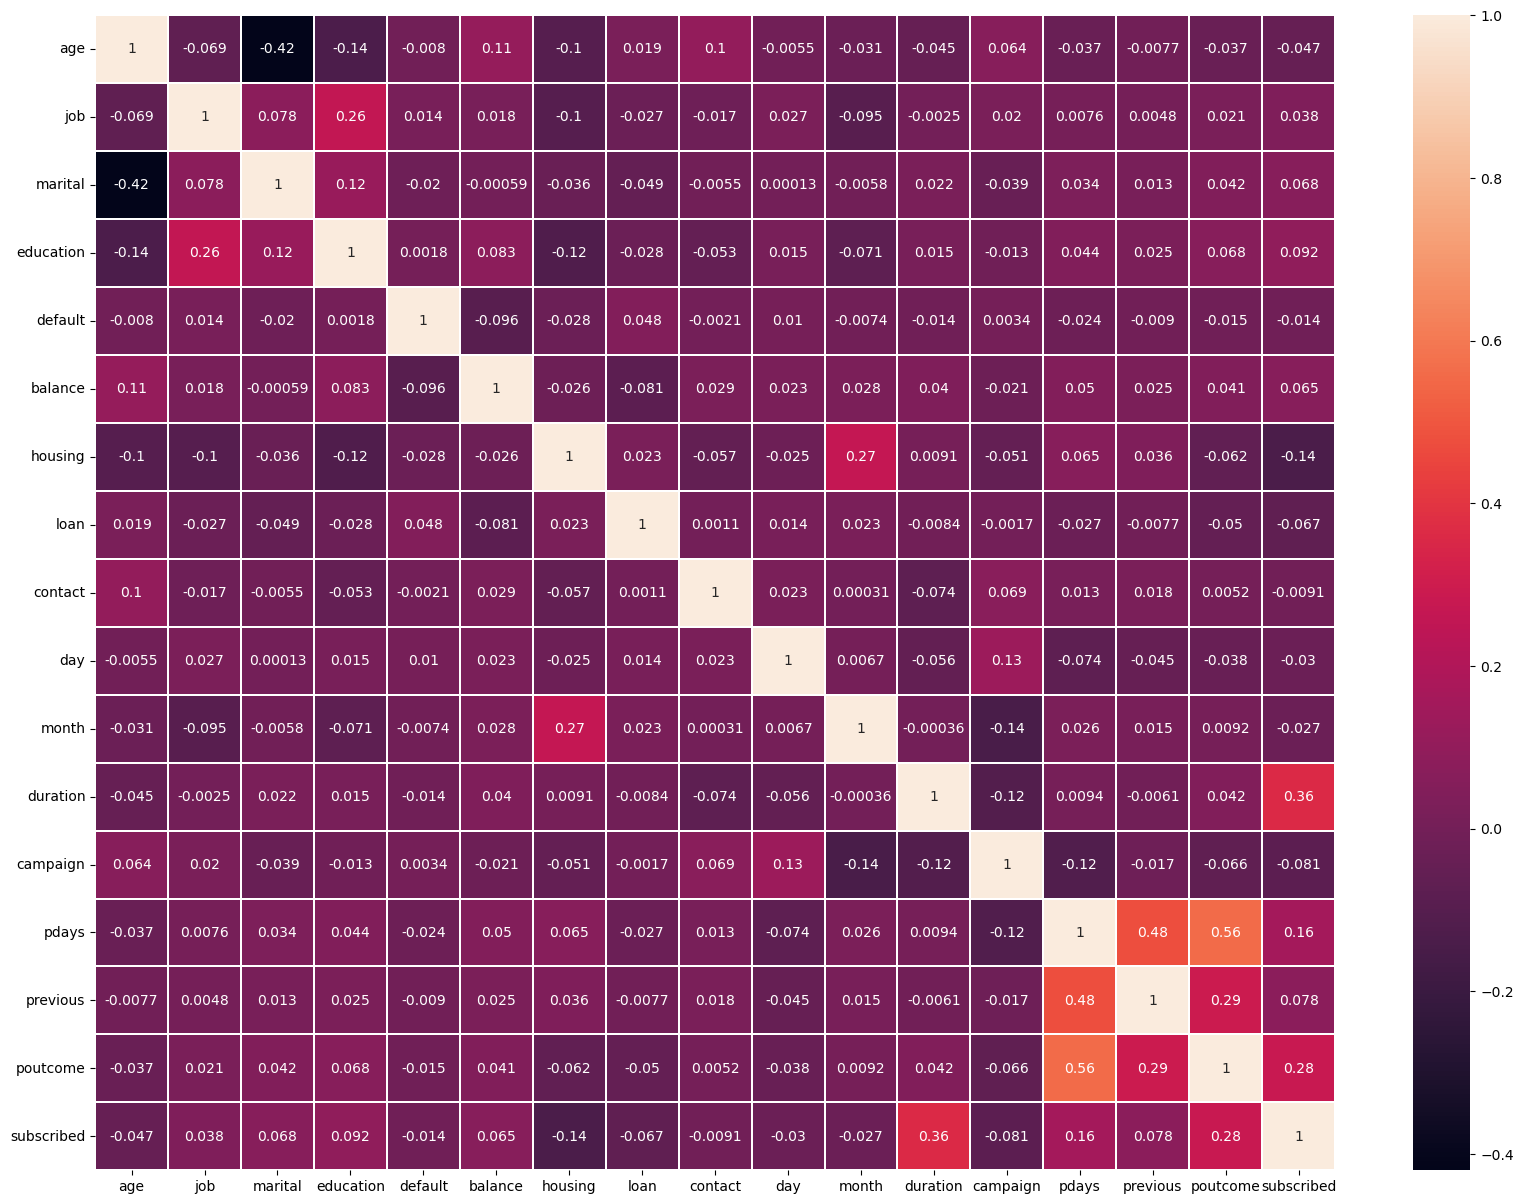

In [75]:
# check multicplinearty problem usinig heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,annot=True)
plt.yticks(rotation=0)
plt.show()

default, contact, day and month is less contribute

In [76]:
from sklearn.preprocessing import StandardScaler   
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
scaled = StandardScaler()
Scaled = pd.DataFrame(scaled.fit_transform(x),columns=x.columns)

In [78]:
# finding variance inflaction factor for each column
vif = []
for i in range(Scaled.shape[1]):
    X = variance_inflation_factor(Scaled,i)
    vif.append(X)

In [79]:
VIF = pd.DataFrame()
VIF['vif'] = vif 
VIF['feature'] = x.columns
VIF

vif    feature
0   1.291652        age
1   1.086255        job
2   1.237179    marital
3   1.122098  education
4   1.013102    default
5   1.047996    balance
6   1.141127    housing
7   1.014119       loan
8   1.026845    contact
9   1.026914        day
10  1.108029      month
11  1.025295   duration
12  1.073690   campaign
13  1.770639      pdays
14  1.298529   previous
15  1.490488   poutcome

consider >= 5 vif value 

data is no multicolinearity problem

In [80]:
from sklearn.feature_selection import SelectKBest,f_classif

In [81]:
best_feature = SelectKBest(score_func=f_classif,k=16)
fit = best_feature.fit(x,y)
best_score = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)
scores = pd.concat([df_columns,best_score],axis=1)
scores.columns = ['feature','score'] 
print(scores.nlargest(16,'score'))

      feature        score
11   duration  3430.539532
15   poutcome  1953.811697
13      pdays   593.832502
6     housing   448.928386
3   education   196.507665
12   campaign   151.682319
14   previous   140.295826
2     marital   106.150529
7        loan   104.817701
5     balance    96.937691
0         age    52.007020
1         job    33.778159
9         day    20.582127
10      month    17.344407
4     default     4.526104
8     contact     1.915426


day, month, default and contact is not best feature and also less contribute

check by correlaion graph and heatmap 

In [82]:
df.drop('default',axis=1,inplace=True)
df.drop('contact',axis=1,inplace=True)

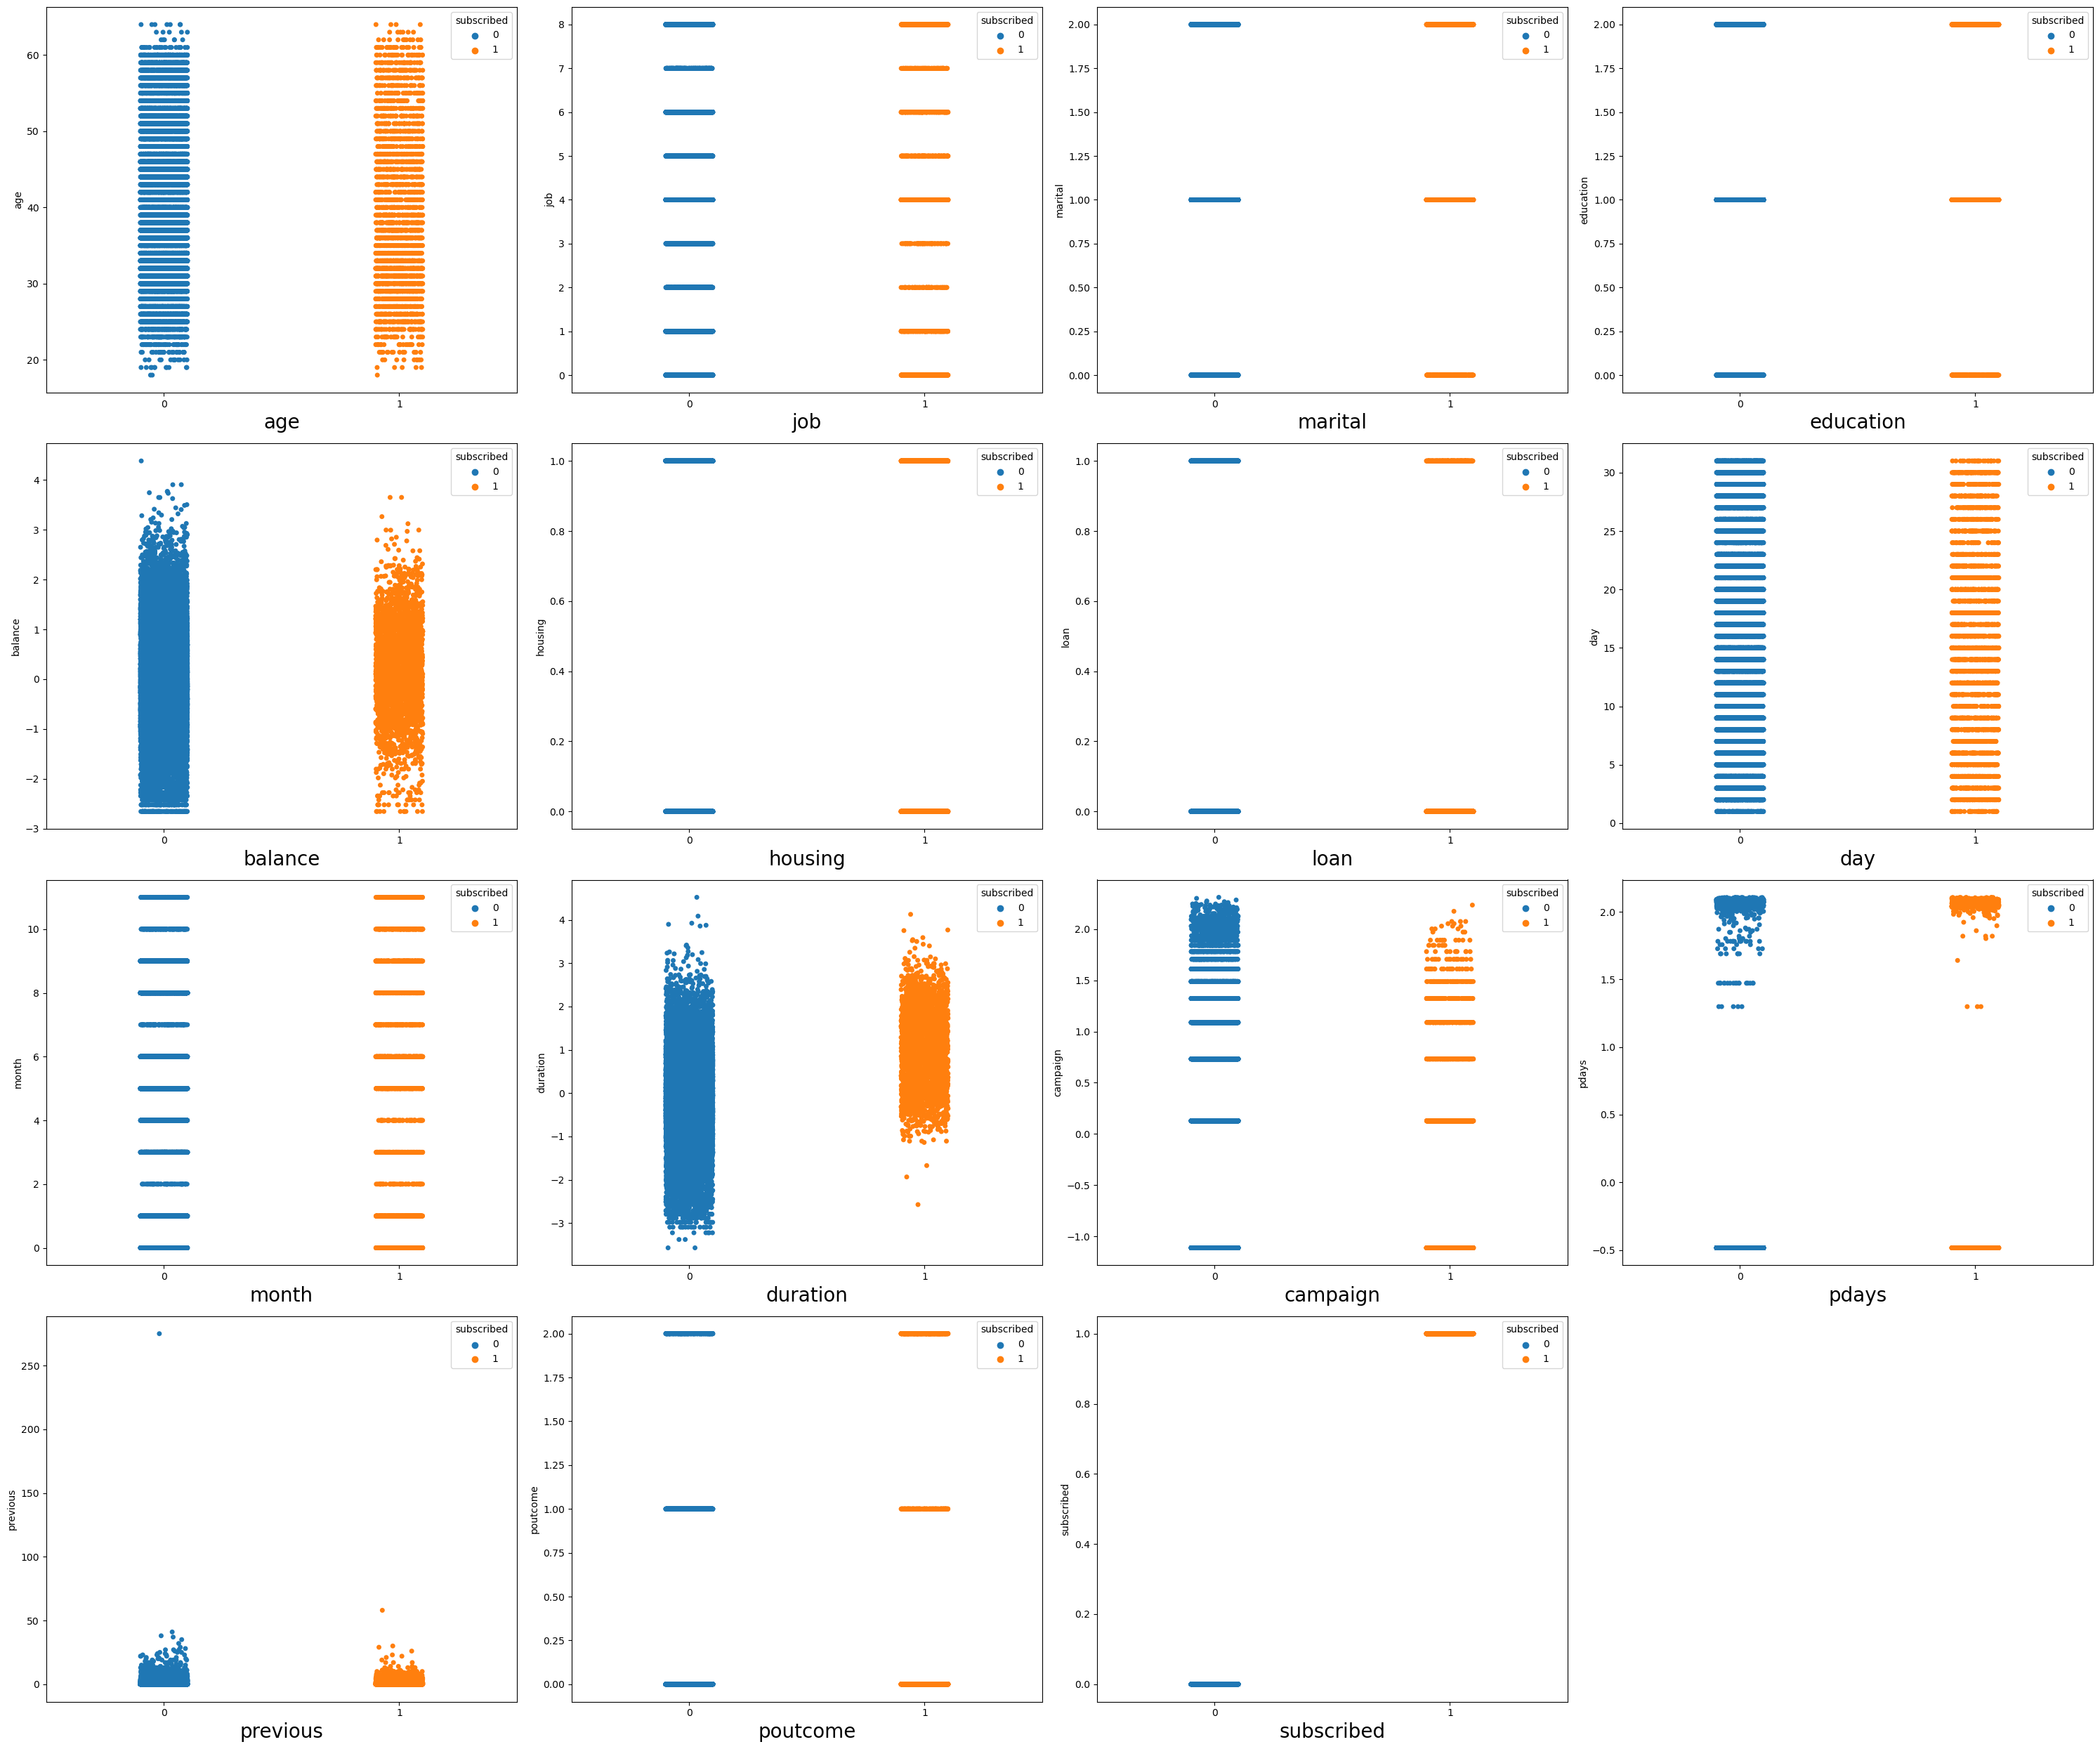

In [83]:
# check feature vs label realation 
plt.figure(figsize=(30,25))
plotnumber = 1

for i in df:
    if plotnumber<=16:
        plt.subplot(4,4,plotnumber)
        sns.stripplot(x=y,y=df[i],hue=y)
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()   

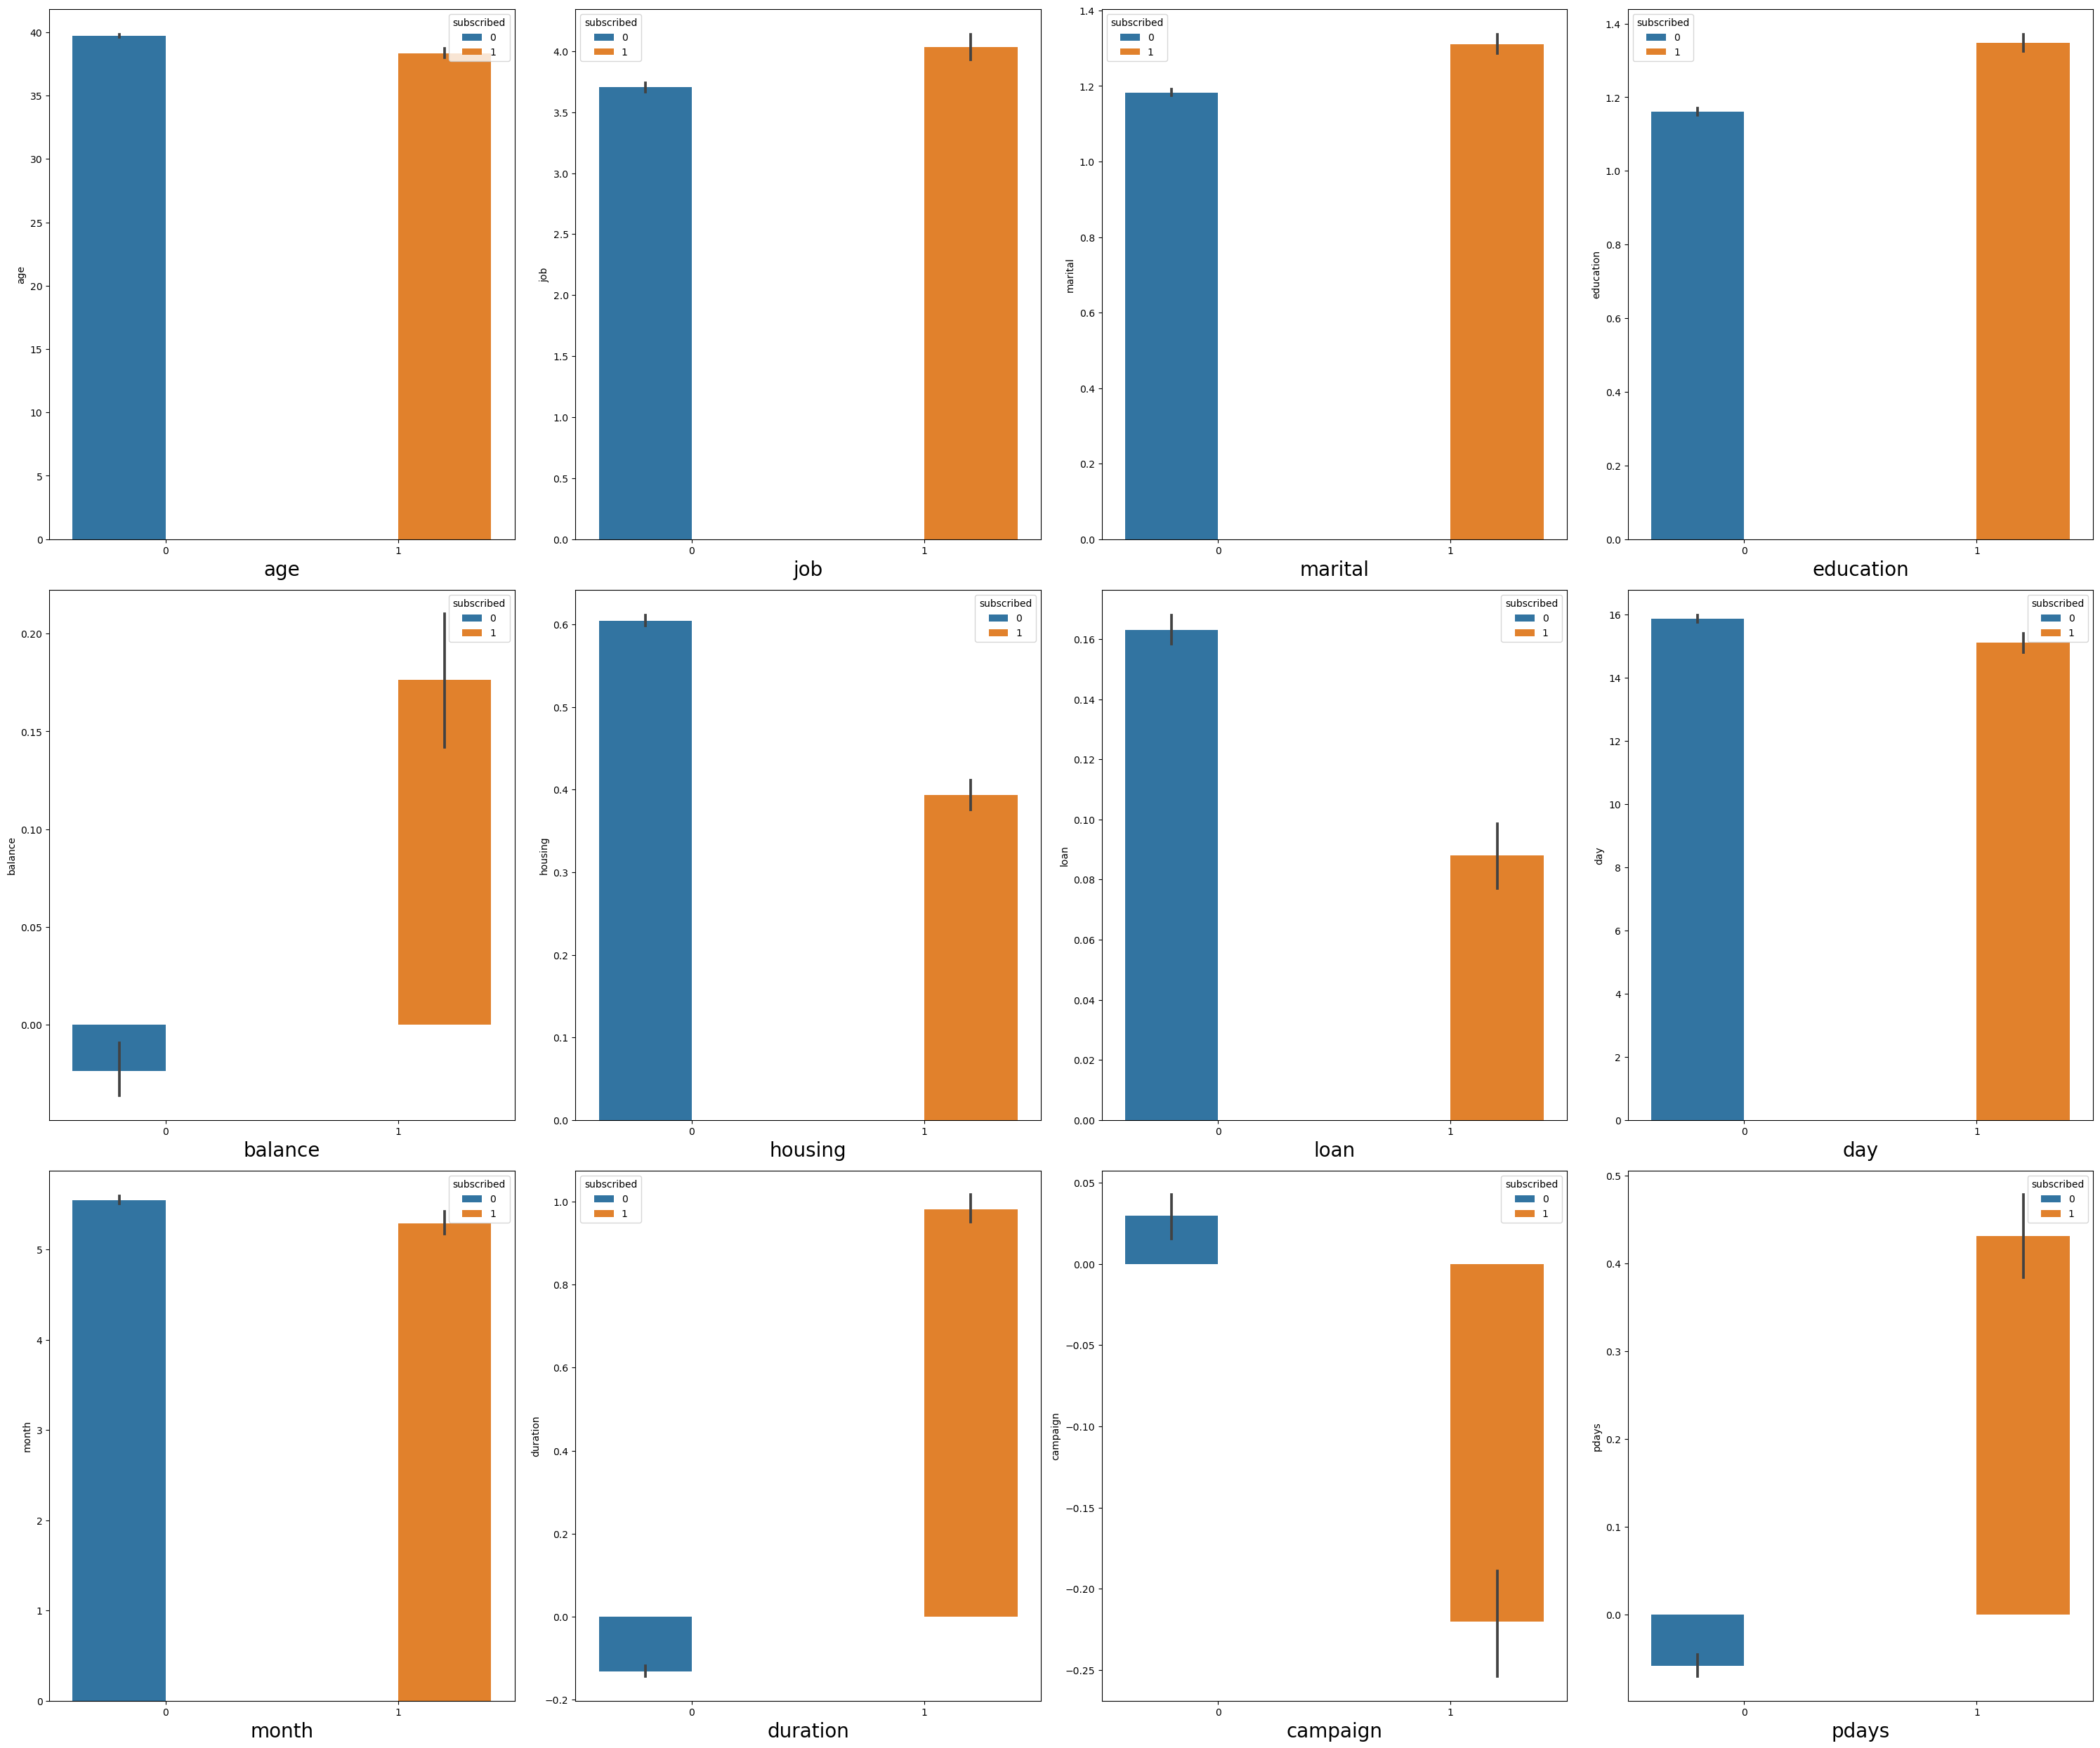

In [84]:
plt.figure(figsize=(30,25))
plotnumber = 1

for i in df:
    if plotnumber<=12:
        plt.subplot(3,4,plotnumber)
        sns.barplot(x=y,y=df[i],hue=y)
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout() 

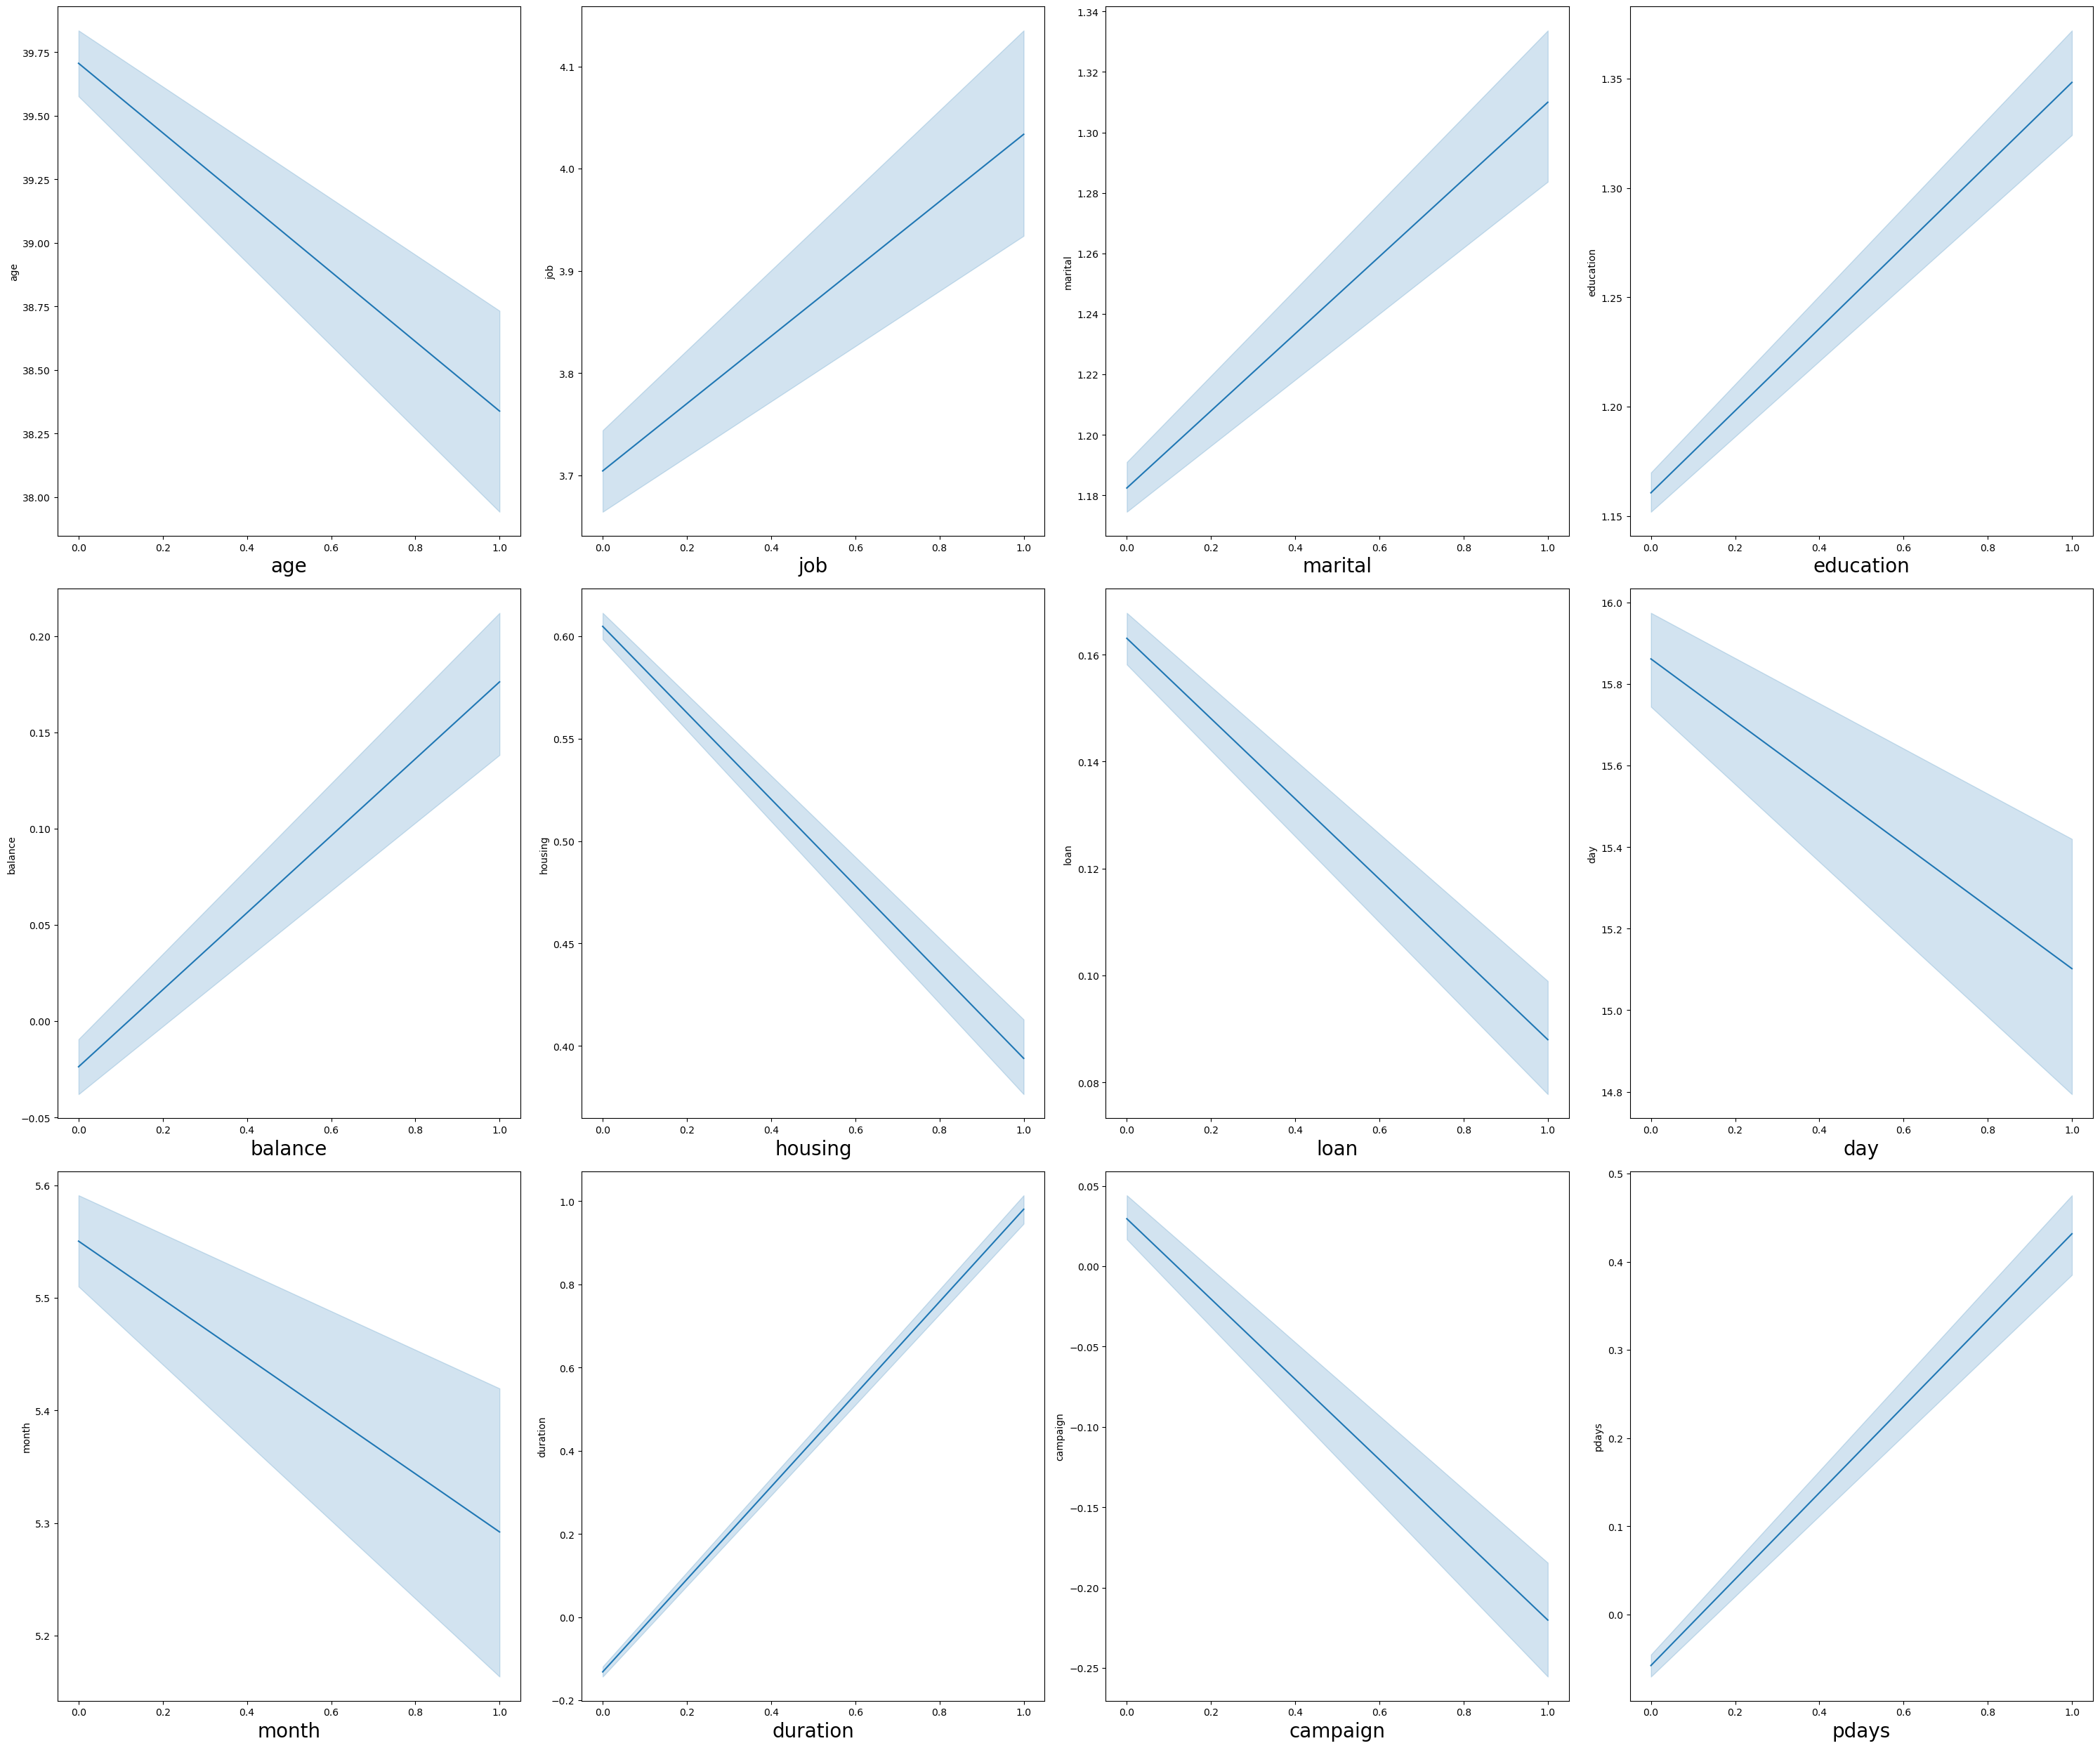

In [85]:
plt.figure(figsize=(30,25))
plotnumber = 1

for i in df:
    if plotnumber<=12:
        plt.subplot(3,4,plotnumber)
        sns.lineplot(x=y,y=df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout() 

<Axes: xlabel='subscribed', ylabel='count'>

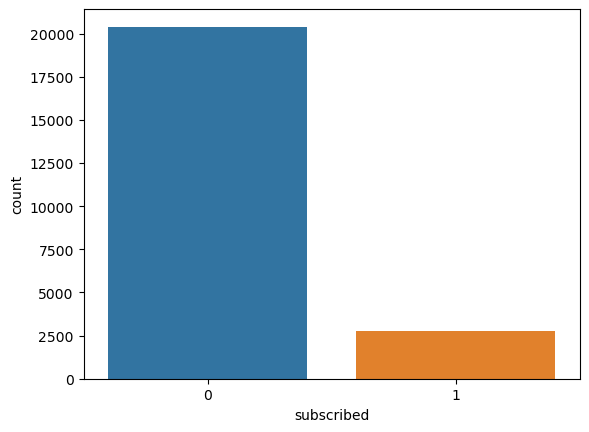

In [86]:
sns.countplot(data=df,x='subscribed')

data is imbalanced

using smote method we balanced data

In [87]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [88]:
x = df.drop('subscribed',axis=1)
y = df['subscribed']

In [89]:
scaled = StandardScaler()
Scaled=pd.DataFrame(scaled.fit_transform(x),columns=x.columns)

In [90]:
x_train,x_test,y_train,y_test = train_test_split(Scaled, y, test_size=0.25, random_state=155)

In [91]:
smp = SMOTE(random_state=55,k_neighbors=3,sampling_strategy=0.80)
X_train,Y_train = smp.fit_resample(x_train,y_train)
Counter(Y_train)

Counter({0: 15330, 1: 12264})

<Axes: xlabel='subscribed', ylabel='count'>

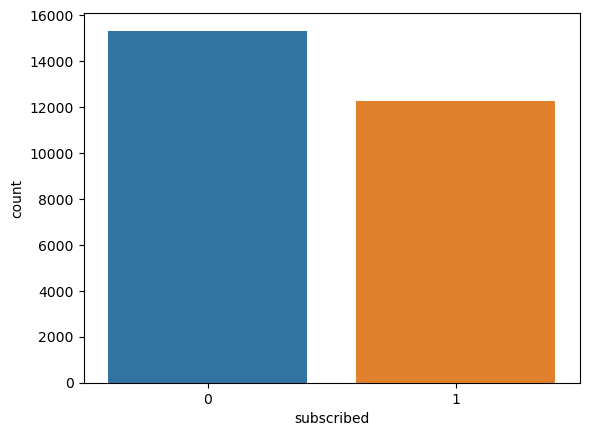

In [92]:
sns.countplot(data=df,x=Y_train)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import cross_val_score, GridSearchCV

In [94]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)
y_pred = LR.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,y_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,y_pred))

Accuracy Score :
 0.8225025924645697


Confusion Score :
 [[4216  858]
 [ 169  543]]


Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.83      0.89      5074
           1       0.39      0.76      0.51       712

    accuracy                           0.82      5786
   macro avg       0.67      0.80      0.70      5786
weighted avg       0.89      0.82      0.84      5786



In [95]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
knn_pred = knn.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,knn_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,knn_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,knn_pred))

Accuracy Score :
 0.8072934669892845


Confusion Score :
 [[4236  838]
 [ 277  435]]


Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.83      0.88      5074
           1       0.34      0.61      0.44       712

    accuracy                           0.81      5786
   macro avg       0.64      0.72      0.66      5786
weighted avg       0.87      0.81      0.83      5786



In [96]:
bg = BaggingClassifier()
bg.fit(X_train,Y_train)
bg_pred = bg.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,bg_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,bg_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,bg_pred))

Accuracy Score :
 0.8807466297960594


Confusion Score :
 [[4691  383]
 [ 307  405]]


Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      5074
           1       0.51      0.57      0.54       712

    accuracy                           0.88      5786
   macro avg       0.73      0.75      0.74      5786
weighted avg       0.89      0.88      0.88      5786



In [97]:
rmf = RandomForestClassifier()
rmf.fit(X_train,Y_train)
rmf_pred = rmf.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,rmf_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,rmf_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,rmf_pred))

Accuracy Score :
 0.8814379536812997


Confusion Score :
 [[4702  372]
 [ 314  398]]


Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      5074
           1       0.52      0.56      0.54       712

    accuracy                           0.88      5786
   macro avg       0.73      0.74      0.73      5786
weighted avg       0.89      0.88      0.88      5786



In [98]:
ada = AdaBoostClassifier()
ada.fit(X_train,Y_train)
ada_pred = ada.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,ada_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,ada_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,ada_pred))

Accuracy Score :
 0.8506740407881093


Confusion Score :
 [[4432  642]
 [ 222  490]]


Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      5074
           1       0.43      0.69      0.53       712

    accuracy                           0.85      5786
   macro avg       0.69      0.78      0.72      5786
weighted avg       0.89      0.85      0.86      5786



In [99]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
gbc_pred = gbc.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,gbc_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,gbc_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,gbc_pred))

Accuracy Score :
 0.8731420670584169


Confusion Score :
 [[4550  524]
 [ 210  502]]


Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      5074
           1       0.49      0.71      0.58       712

    accuracy                           0.87      5786
   macro avg       0.72      0.80      0.75      5786
weighted avg       0.90      0.87      0.88      5786



In [100]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_pred = dt.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,dt_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,dt_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,dt_pred))

Accuracy Score :
 0.8473902523332181


Confusion Score :
 [[4547  527]
 [ 356  356]]


Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.90      0.91      5074
           1       0.40      0.50      0.45       712

    accuracy                           0.85      5786
   macro avg       0.67      0.70      0.68      5786
weighted avg       0.86      0.85      0.85      5786



In [101]:
svc = SVC()
svc.fit(X_train,Y_train)
svc_pred = svc.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,svc_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,svc_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,svc_pred))

Accuracy Score :
 0.8269961977186312


Confusion Score :
 [[4232  842]
 [ 159  553]]


Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.83      0.89      5074
           1       0.40      0.78      0.52       712

    accuracy                           0.83      5786
   macro avg       0.68      0.81      0.71      5786
weighted avg       0.89      0.83      0.85      5786



In [102]:
LR_score = cross_val_score(LR,X_train,Y_train,cv=15)
print(LR_score)
print(LR_score.mean())
print(accuracy_score(y_test,y_pred) - LR_score.mean())

[0.79673913 0.80054348 0.81684783 0.80434783 0.84347826 0.8048913
 0.80380435 0.81956522 0.82934783 0.82109842 0.82109842 0.82871126
 0.81457314 0.82327352 0.82381729]
0.8168091511612328
0.0056934413033369324


In [103]:
bg_score = cross_val_score(bg,X_train,Y_train,cv=15)
print(bg_score)
print(bg_score.mean())
print(accuracy_score(y_test,bg_pred) - bg_score.mean())

[0.84565217 0.85869565 0.89184783 0.94456522 0.94782609 0.93858696
 0.93369565 0.93967391 0.95108696 0.94235998 0.94290375 0.93855356
 0.94344753 0.94725394 0.93964111]
0.9270526869517932
-0.04630605715573377


In [104]:
rmf_score = cross_val_score(rmf,X_train,Y_train,cv=15)
print(rmf_score)
print(rmf_score.mean())
print(accuracy_score(y_test,rmf_pred) - rmf_score.mean())

[0.87119565 0.88695652 0.92391304 0.95815217 0.96521739 0.9548913
 0.95271739 0.95       0.96195652 0.95377923 0.95377923 0.96084829
 0.9564981  0.96356716 0.954323  ]
0.944519666485409
-0.06308171280410924


In [105]:
gbc_score = cross_val_score(gbc,X_train,Y_train,cv=15)
print(gbc_score)
print(gbc_score.mean())
print(accuracy_score(y_test,gbc_pred) - gbc_score.mean())

[0.81195652 0.82228261 0.86956522 0.925      0.93913043 0.9048913
 0.91141304 0.91576087 0.925      0.91027732 0.91734638 0.92441544
 0.92604676 0.92604676 0.91734638]
0.9030986043139387
-0.02995653725552183


In [106]:
ada_score = cross_val_score(ada,X_train,Y_train,cv=15)
print(ada_score)
print(ada_score.mean())
print(accuracy_score(y_test,ada_pred) - ada_score.mean())

[0.79565217 0.80054348 0.84347826 0.87826087 0.89184783 0.86358696
 0.87119565 0.87663043 0.88532609 0.87275693 0.88036977 0.88961392
 0.88471996 0.89396411 0.87003806]
0.8665322993750542
-0.015858258586944896


In [107]:
knn_score = cross_val_score(knn,X_train,Y_train,cv=15)
print(knn_score)
print(knn_score.mean())
print(accuracy_score(y_test,knn_pred) - knn_score.mean())

[0.8951087  0.89565217 0.89076087 0.90706522 0.92228261 0.90054348
 0.89130435 0.9076087  0.90543478 0.89777053 0.90266449 0.90320827
 0.90320827 0.90973355 0.90483959]
0.9024790371263526
-0.09518557013706808


In [108]:
dt_score = cross_val_score(dt,X_train,Y_train,cv=15)
print(dt_score)
print(dt_score.mean())
print(accuracy_score(y_test,dt_pred) - dt_score.mean())

[0.78967391 0.8076087  0.86630435 0.91304348 0.91467391 0.90271739
 0.91576087 0.91902174 0.92554348 0.92006525 0.91571506 0.9211528
 0.90810223 0.92767809 0.91299619]
0.8973371633922028
-0.049946911058984744


In [109]:
svc_score = cross_val_score(svc,X_train,Y_train,cv=15)
print(svc_score)
print(svc_score.mean())
print(accuracy_score(y_test,svc_pred) - svc_score.mean())

[0.83804348 0.84619565 0.85652174 0.85434783 0.88695652 0.85434783
 0.85108696 0.86630435 0.87282609 0.85916259 0.85861881 0.87166939
 0.87438825 0.88036977 0.86840674]
0.8626163991142003
-0.035620201395569095


In [110]:
from sklearn.model_selection import RandomizedSearchCV

In [111]:
knn = KNeighborsClassifier()

In [112]:
param = {'n_neighbors': range(1,10),
         'weights' : ['uniform', 'distance'],
         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
         'leaf_size' : range(1,10)}

In [113]:
KNN=RandomizedSearchCV(KNeighborsClassifier(),param_distributions = param)
KNN.fit(X_train,Y_train)

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': range(1, 10),
                                        'n_neighbors': range(1, 10),
                                        'weights': ['uniform', 'distance']})

In [114]:
KNN.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=4, n_neighbors=1)

In [115]:
KNn =  KNeighborsClassifier(n_neighbors=1,algorithm='ball_tree',leaf_size=7)
KNn.fit(X_train,Y_train)
KNn_pred = KNn.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,KNn_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,KNn_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,KNn_pred))

Accuracy Score :
 0.8423781541652264


Confusion Score :
 [[4580  494]
 [ 418  294]]


Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      5074
           1       0.37      0.41      0.39       712

    accuracy                           0.84      5786
   macro avg       0.64      0.66      0.65      5786
weighted avg       0.85      0.84      0.85      5786



In [116]:
from sklearn import metrics

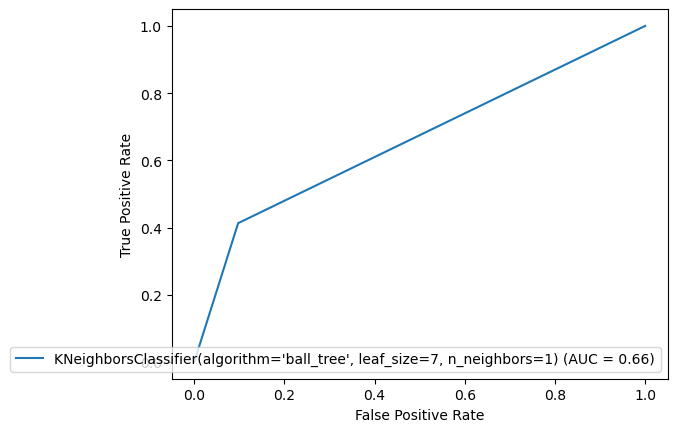

In [117]:
fpr,tpr,threshold = metrics.roc_curve(y_test,KNn_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=KNn)
display.plot()

In [118]:
import pickle
filename = 'bank.pkl'
pickle.dump(KNn, open(filename,'wb'))

In [119]:
loded = pickle.load(open('bank.pkl','rb'))
loded.score(x_test,y_test)

0.8423781541652264

In [120]:
test = pd.read_csv(r"C:\Users\CHETAN\OneDrive\Desktop\practice_project\termdeposit_test.csv")
test.head(10)

ID  age            job   marital  education default  balance housing  \
0  38441   32       services   married  secondary      no      118     yes   
1  40403   78        retired  divorced    primary      no     2787      no   
2   3709   31  self-employed    single   tertiary      no      144     yes   
3  37422   57       services    single    primary      no     3777     yes   
4  12527   45    blue-collar  divorced  secondary      no     -705      no   
5  16013   32     management    single   tertiary      no        0     yes   
6    196   33    blue-collar    single  secondary      no      307     yes   
7   8516   37     management   married  secondary      no      341      no   
8  31208   36     technician  divorced   tertiary      no     1381      no   
9  38462   50         admin.    single    primary      no      181     yes   

  loan    contact  day month  duration  campaign  pdays  previous poutcome  
0   no   cellular   15   may        20         6     -1         0  unknown  
1   no  telephone    1   jul       372         1     -1         0  unknown  
2   no    unknown   16   may       676         1     -1         0  unknown  
3   no  telephone   13   may        65         2     -1         0  unknown  
4  yes    unknown    3   jul       111         1     -1         0  unknown  
5   no   cellular   22   jul       455         2     -1         0  unknown  
6   no    unknown    5   may       309         2     -1         0  unknown  
7   no    unknown    3   jun       120         2     -1         0  unknown  
8   no   cellular    2   mar       149         1     -1         0  unknown  
9   no   cellular   15   may       119         4    372         3  failure

In [121]:
test.tail(10)

ID  age            job  marital  education default  balance housing  \
13554  11568   51     unemployed  married  secondary      no     -267      no   
13555  23487   34     management   single   tertiary      no     1070      no   
13556  27122   46  self-employed  married    primary      no     3155     yes   
13557    837   30       services   single  secondary      no     -174     yes   
13558  35237   32     technician   single  secondary      no      129     yes   
13559  23465   39     management  married   tertiary      no       45      no   
13560  11743   54    blue-collar  married    primary      no     2281     yes   
13561  28292   35        retired  married    primary      no      285     yes   
13562  45163   29         admin.   single  secondary      no      464      no   
13563  34839   29         admin.  married  secondary      no        2     yes   

      loan   contact  day month  duration  campaign  pdays  previous poutcome  
13554  yes   unknown   19   jun       208         2     -1         0  unknown  
13555   no  cellular   28   aug        91        15     -1         0  unknown  
13556   no  cellular   21   nov       271         1     -1         0  unknown  
13557   no   unknown    7   may       113         1     -1         0  unknown  
13558   no  cellular    7   may       213         1     -1         0  unknown  
13559   no  cellular   28   aug       148         4     -1         0  unknown  
13560   no   unknown   20   jun       158         1     -1         0  unknown  
13561   no  cellular   29   jan       136         1     -1         0  unknown  
13562   no  cellular    9   nov       208         2     91         3  success  
13563   no  cellular    6   may       339         1    362         1  failure

In [122]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [123]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [124]:
test.duplicated().sum()

0

In [125]:
# check whitespace 
for i in test:
    x = test[i].value_counts()
    print(x)

38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: ID, Length: 13564, dtype: int64
32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64
married     8119
single      3868
divorced    1577
Name: marital, dtype: int64
secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64
no     13334
yes      230
Name: default, dtype: int64
 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 8180       1
 3684       1
 4256       1
Name: balance, Len

In [126]:
# seprate numrical feature and catgorical feature
Cat_data = []
Num_data = []
for i in test.columns:
    if test[i].dtype == 'object':
        Cat_data.append(i)
    else: 
        Num_data.append(i)

In [127]:
test[Cat_data]

job   marital  education default housing loan    contact  \
0           services   married  secondary      no     yes   no   cellular   
1            retired  divorced    primary      no      no   no  telephone   
2      self-employed    single   tertiary      no     yes   no    unknown   
3           services    single    primary      no     yes   no  telephone   
4        blue-collar  divorced  secondary      no      no  yes    unknown   
...              ...       ...        ...     ...     ...  ...        ...   
13559     management   married   tertiary      no      no   no   cellular   
13560    blue-collar   married    primary      no     yes   no    unknown   
13561        retired   married    primary      no     yes   no   cellular   
13562         admin.    single  secondary      no      no   no   cellular   
13563         admin.   married  secondary      no     yes   no   cellular   

      month poutcome  
0       may  unknown  
1       jul  unknown  
2       may  unknown  
3       may  unknown  
4       jul  unknown  
...     ...      ...  
13559   aug  unknown  
13560   jun  unknown  
13561   jan  unknown  
13562   nov  success  
13563   may  failure  

[13564 rows x 9 columns]

In [128]:
test[Num_data]

ID  age  balance  day  duration  campaign  pdays  previous
0      38441   32      118   15        20         6     -1         0
1      40403   78     2787    1       372         1     -1         0
2       3709   31      144   16       676         1     -1         0
3      37422   57     3777   13        65         2     -1         0
4      12527   45     -705    3       111         1     -1         0
...      ...  ...      ...  ...       ...       ...    ...       ...
13559  23465   39       45   28       148         4     -1         0
13560  11743   54     2281   20       158         1     -1         0
13561  28292   35      285   29       136         1     -1         0
13562  45163   29      464    9       208         2     91         3
13563  34839   29        2    6       339         1    362         1

[13564 rows x 8 columns]

In [129]:
# drop id column 
test = test.drop('ID',axis=1)

In [130]:
# check unique values in catgorical feature
X = []
for i in Cat_data:
    X.append(test[i].unique())
      
Unique = pd.DataFrame()
Unique['feature'] = Cat_data
Unique['Unique'] = X
Unique

feature                                             Unique
0        job  [services, retired, self-employed, blue-collar...
1    marital                        [married, divorced, single]
2  education            [secondary, primary, tertiary, unknown]
3    default                                          [no, yes]
4    housing                                          [yes, no]
5       loan                                          [no, yes]
6    contact                     [cellular, telephone, unknown]
7      month  [may, jul, jun, mar, feb, sep, aug, dec, jan, ...
8   poutcome                 [unknown, failure, other, success]

<Axes: xlabel='age', ylabel='Density'>

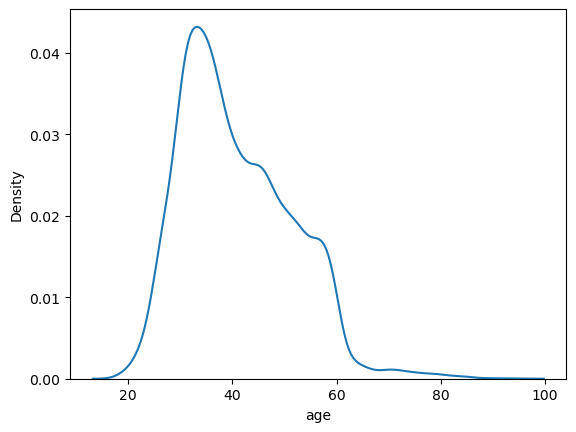

In [131]:
# check age data with kde plot
sns.kdeplot(data=test, x= 'age')

In [132]:
test.drop(test[test['age']>=65].index,inplace=True)

<Axes: xlabel='age', ylabel='Density'>

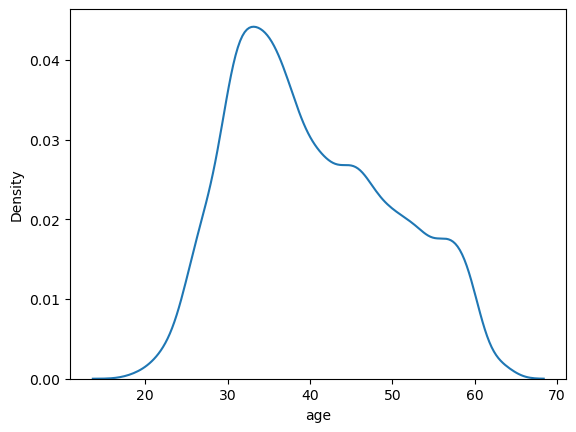

In [133]:
# check age data with kde plot
sns.kdeplot(data=test, x= 'age')

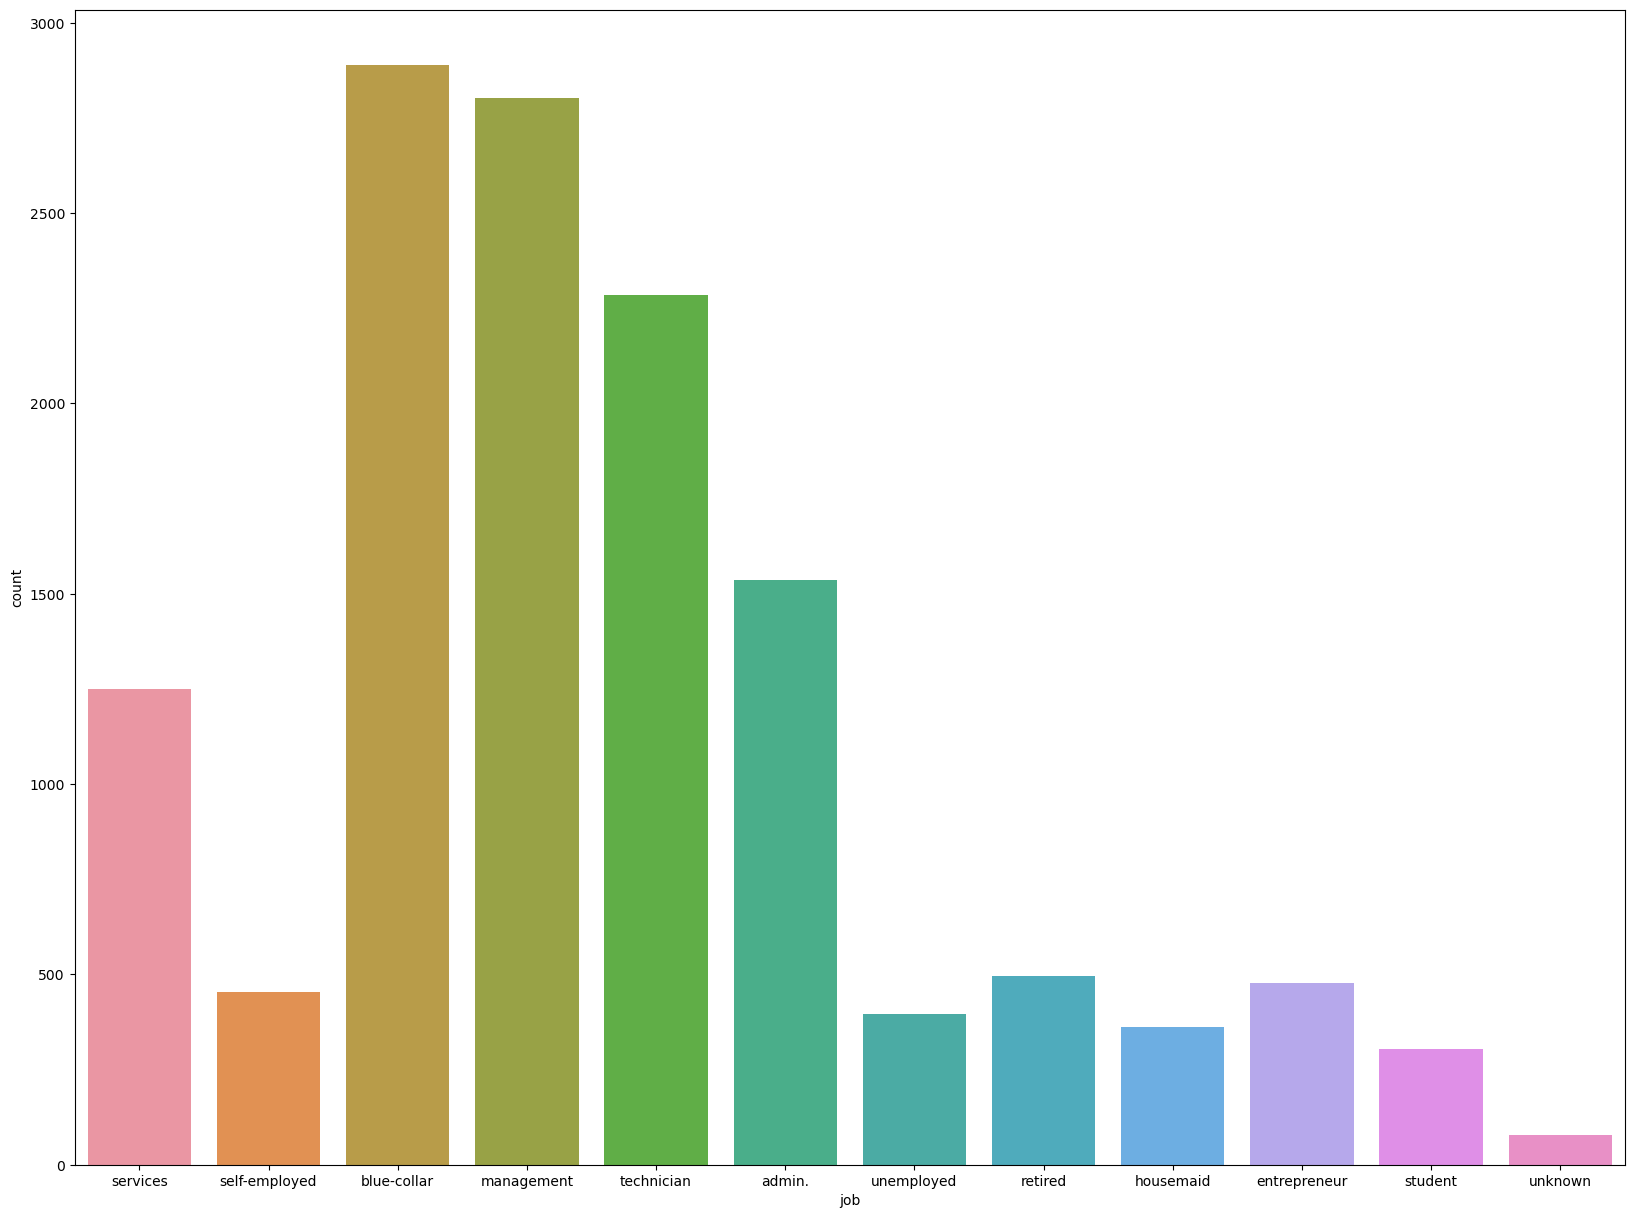

In [134]:
plt.figure(figsize=(20,15))
sns.countplot(data=test, x= 'job')
plt.show()

In [135]:
test.drop(test[test['job']=='unknown'].index,inplace=True)
test.drop(test[test['job']=='unemployed'].index,inplace=True)
test.drop(test[test['job']=='retired'].index,inplace=True)

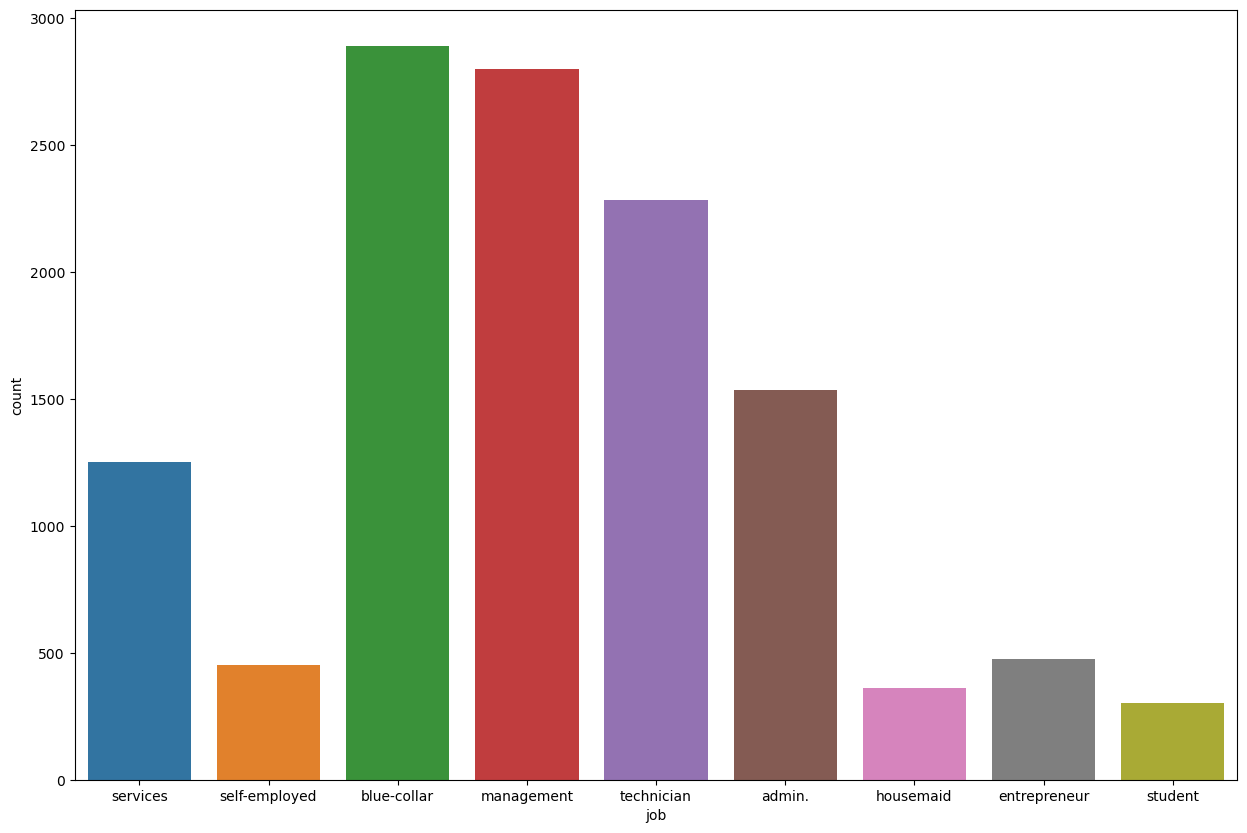

In [136]:
plt.figure(figsize=(15,10))
sns.countplot(data=test, x= 'job')
plt.show()

<Axes: xlabel='education', ylabel='count'>

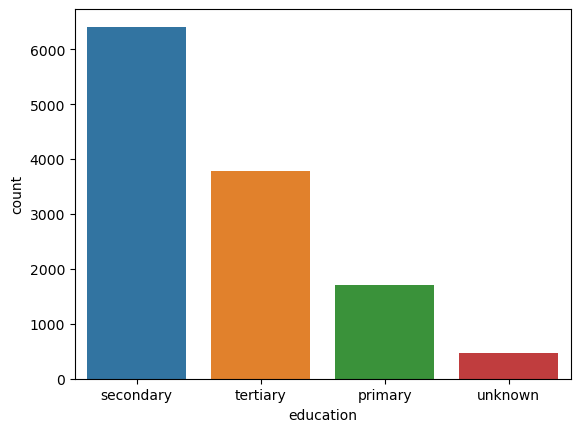

In [137]:
sns.countplot(data=test, x= 'education')

In [138]:
test.drop(test[test['education'] == 'unknown'].index,inplace=True)

<Axes: xlabel='education', ylabel='count'>

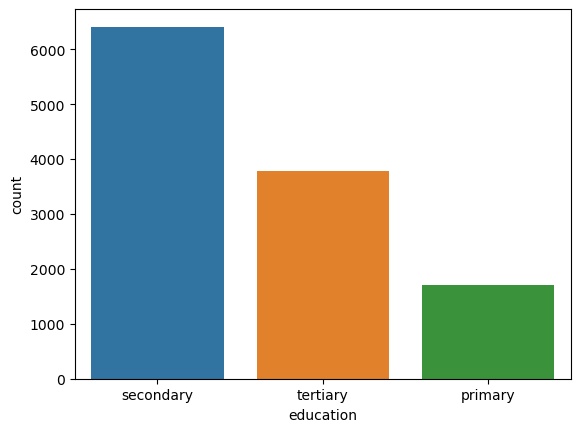

In [139]:
sns.countplot(data=test, x= 'education')

<Axes: xlabel='marital', ylabel='count'>

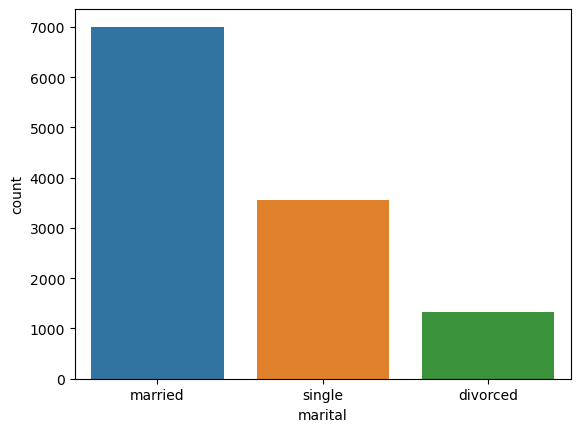

In [140]:
sns.countplot(data = test , x = 'marital')

<Axes: xlabel='default', ylabel='count'>

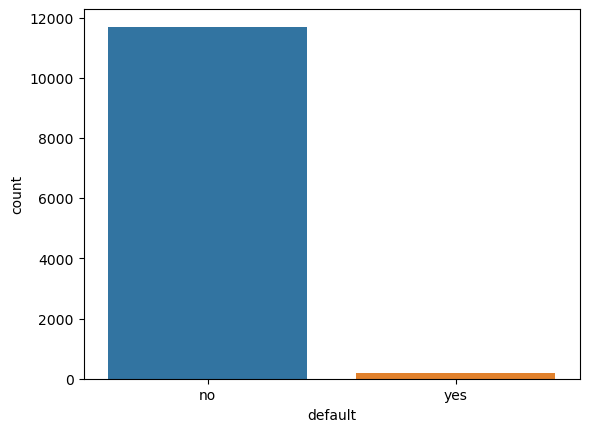

In [141]:
sns.countplot(data=test, x= 'default')

<Axes: xlabel='balance', ylabel='Density'>

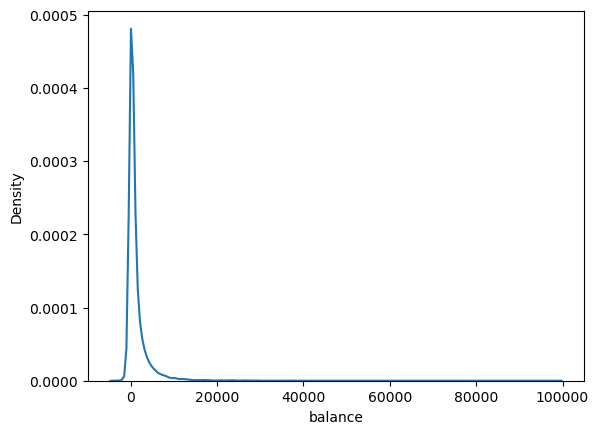

In [142]:
sns.kdeplot(data=test,x='balance')

In [143]:
# drop the balance data whos less than and 0 balance 
test.drop(test[test['balance'] <=0].index,inplace=True)

<Axes: xlabel='housing', ylabel='count'>

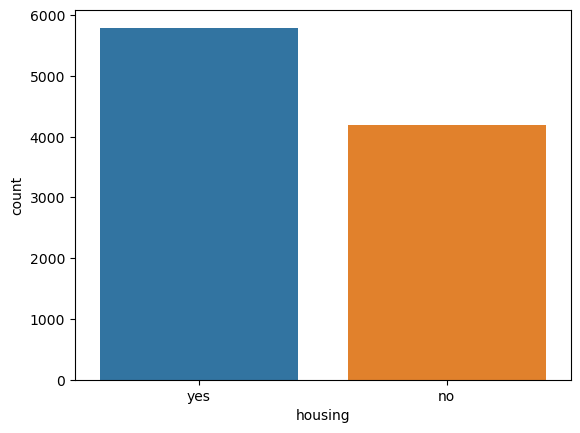

In [144]:
sns.countplot(data=test, x = 'housing')

<Axes: xlabel='loan', ylabel='count'>

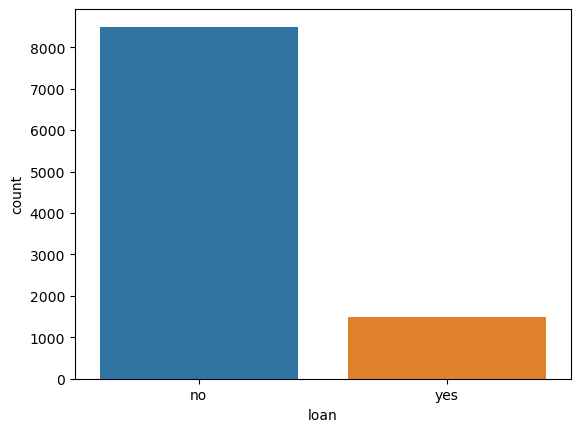

In [145]:
sns.countplot(data=test, x = 'loan')

<Axes: xlabel='contact', ylabel='count'>

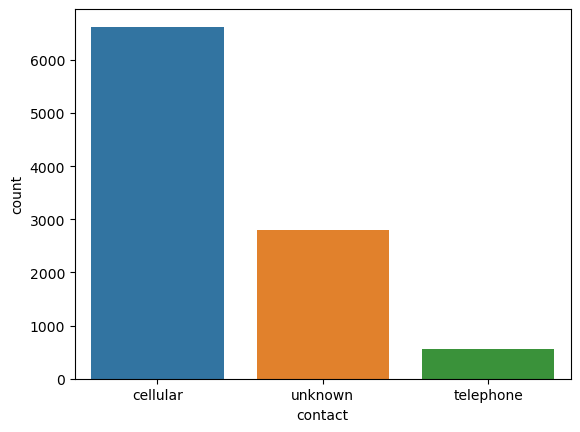

In [146]:
sns.countplot(data=test, x = 'contact')

In [147]:
for i in test['contact']:
    if i== 'unknown':
        test['contact'].replace(i, np.nan,inplace=True)

In [148]:
test['contact'].fillna(test['contact'].mode()[0],inplace=True)

<Axes: xlabel='contact', ylabel='count'>

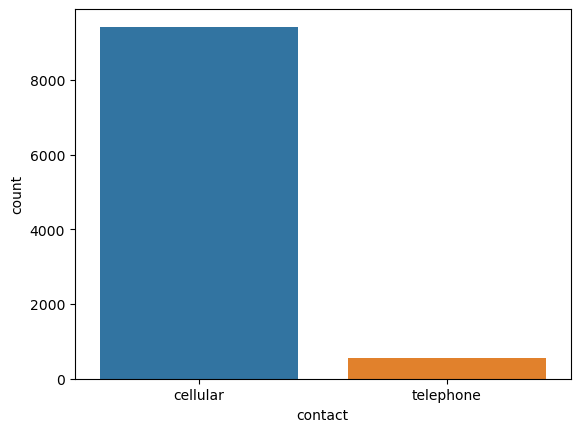

In [149]:
 sns.countplot(data=test, x = 'contact')

<Axes: xlabel='day', ylabel='count'>

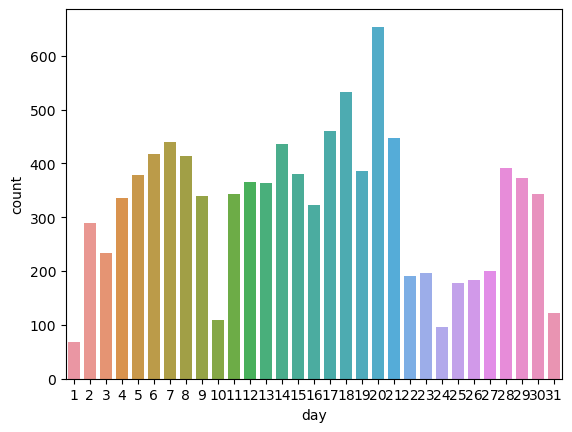

In [150]:
sns.countplot(data = test , x= 'day')

<Axes: xlabel='month', ylabel='count'>

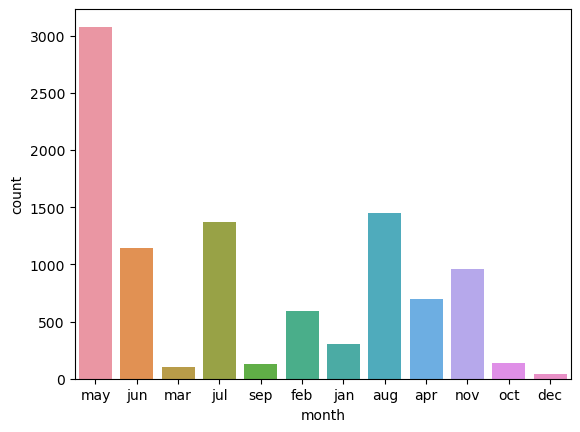

In [151]:
sns.countplot(data=test, x= 'month')

<Axes: xlabel='duration', ylabel='Density'>

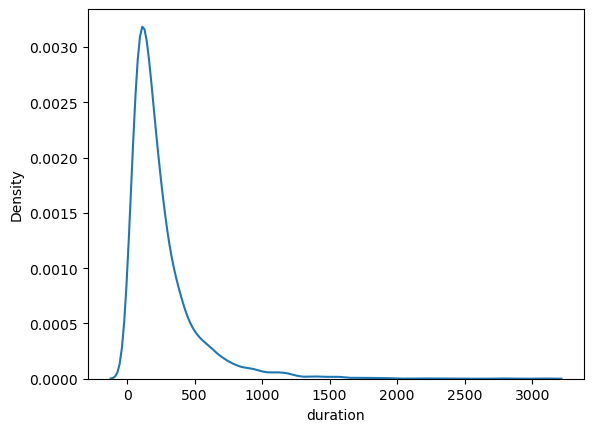

In [152]:
sns.kdeplot(data=test,x='duration')

<Axes: xlabel='campaign', ylabel='Density'>

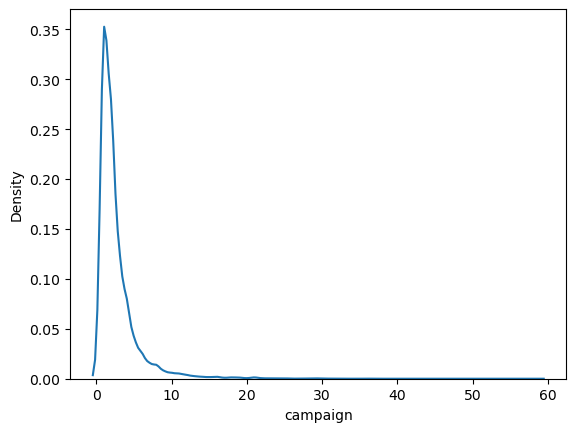

In [153]:
sns.kdeplot(data=test,x='campaign')

<Axes: xlabel='pdays', ylabel='Density'>

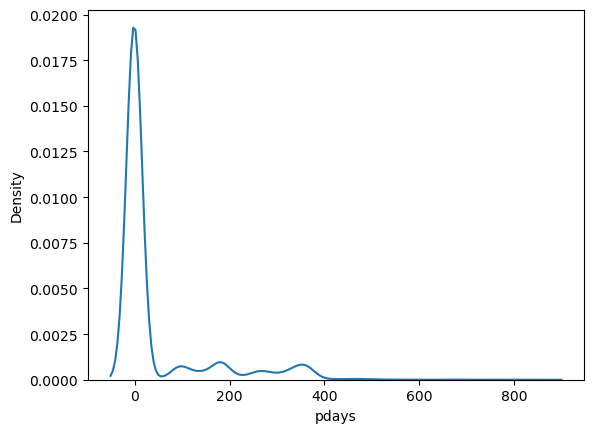

In [154]:
sns.kdeplot(data=test,x= 'pdays')

<Axes: xlabel='previous', ylabel='Density'>

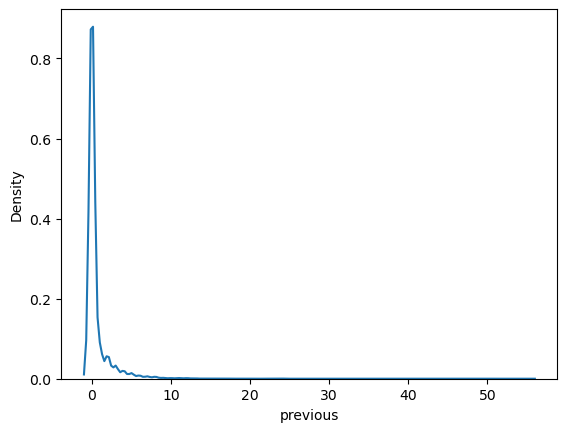

In [155]:
sns.kdeplot(data=test,x='previous')

<Axes: xlabel='poutcome', ylabel='count'>

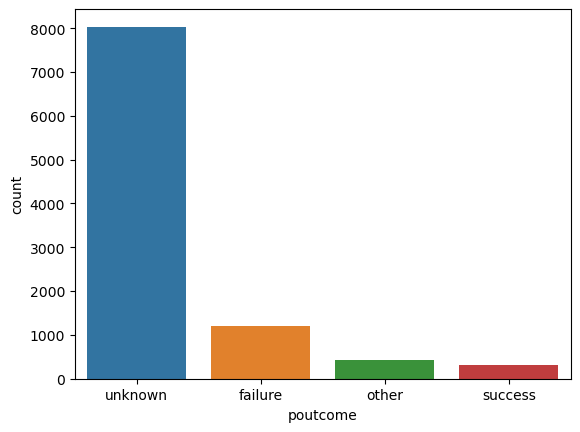

In [156]:
sns.countplot(data=test,x='poutcome')

In [157]:
for i in test['poutcome']:
    if i== 'unknown':
        test['poutcome'].replace(i, np.nan,inplace=True)   

In [158]:
test['poutcome'].isnull().sum()

8032

In [159]:
test['poutcome'].fillna(test['poutcome'].mode()[0],inplace=True)

In [160]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9989 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9989 non-null   int64 
 1   job        9989 non-null   object
 2   marital    9989 non-null   object
 3   education  9989 non-null   object
 4   default    9989 non-null   object
 5   balance    9989 non-null   int64 
 6   housing    9989 non-null   object
 7   loan       9989 non-null   object
 8   contact    9989 non-null   object
 9   day        9989 non-null   int64 
 10  month      9989 non-null   object
 11  duration   9989 non-null   int64 
 12  campaign   9989 non-null   int64 
 13  pdays      9989 non-null   int64 
 14  previous   9989 non-null   int64 
 15  poutcome   9989 non-null   object
dtypes: int64(7), object(9)
memory usage: 1.3+ MB


In [161]:
for i in test:
    x = test[i].value_counts()
    print(x)

32    506
34    494
31    458
33    454
35    451
30    448
36    440
37    394
38    366
39    334
41    297
40    291
46    286
45    272
44    265
42    264
29    257
43    256
47    250
28    245
48    238
49    231
27    222
50    215
53    211
51    203
26    188
52    175
54    153
57    151
55    149
56    147
25    127
58    119
59    113
60     78
24     68
23     49
22     37
21     22
62     17
61     13
63     10
19      9
20      8
64      6
18      2
Name: age, dtype: int64
management       2323
blue-collar      2299
technician       1854
admin.           1237
services          974
self-employed     392
entrepreneur      372
housemaid         297
student           241
Name: job, dtype: int64
married     5897
single      3049
divorced    1043
Name: marital, dtype: int64
secondary    5321
tertiary     3262
primary      1406
Name: education, dtype: int64
no     9913
yes      76
Name: default, dtype: int64
1       52
2       43
3       40
4       34
5       29
        ..
696

In [162]:
# convert object datype to numric datatpe using LabelEncoder 
from sklearn.preprocessing import LabelEncoder
test['job'] = LabelEncoder().fit_transform(test['job'])
test['marital'] = LabelEncoder().fit_transform(test['marital'])
test['education'] = LabelEncoder().fit_transform(test['education'])
test['default'] = LabelEncoder().fit_transform(test['default'])
test['housing'] = LabelEncoder().fit_transform(test['housing'])
test['loan'] = LabelEncoder().fit_transform(test['loan'])
test['contact'] = LabelEncoder().fit_transform(test['contact'])
test['month'] = LabelEncoder().fit_transform(test['month'])
test['poutcome'] = LabelEncoder().fit_transform(test['poutcome'])


In [163]:
test.shape

(9989, 16)

In [164]:
test.describe()

age          job      marital    education      default  \
count  9989.000000  9989.000000  9989.000000  9989.000000  9989.000000   
mean     39.520573     3.759035     1.200821     1.185804     0.007608   
std       9.283379     2.791102     0.607749     0.657901     0.086898   
min      18.000000     0.000000     0.000000     0.000000     0.000000   
25%      32.000000     1.000000     1.000000     1.000000     0.000000   
50%      38.000000     4.000000     1.000000     1.000000     0.000000   
75%      46.000000     6.000000     2.000000     2.000000     0.000000   
max      64.000000     8.000000     2.000000     2.000000     1.000000   

            balance      housing         loan      contact          day  \
count   9989.000000  9989.000000  9989.000000  9989.000000  9989.000000   
mean    1589.439083     0.579738     0.149565     0.056362    15.639003   
std     3093.773396     0.493626     0.356662     0.230631     8.189915   
min        1.000000     0.000000     0.000000     0.000000     1.000000   
25%      209.000000     0.000000     0.000000     0.000000     8.000000   
50%      613.000000     1.000000     0.000000     0.000000    16.000000   
75%     1681.000000     1.000000     0.000000     0.000000    21.000000   
max    98417.000000     1.000000     1.000000     1.000000    31.000000   

             month     duration     campaign        pdays     previous  \
count  9989.000000  9989.000000  9989.000000  9989.000000  9989.000000   
mean      5.500951   256.866753     2.749224    44.039143     0.631395   
std       3.061596   258.130233     3.054878   104.623025     2.112163   
min       0.000000     0.000000     1.000000    -1.000000     0.000000   
25%       3.000000   101.000000     1.000000    -1.000000     0.000000   
50%       6.000000   178.000000     2.000000    -1.000000     0.000000   
75%       8.000000   316.000000     3.000000    -1.000000     0.000000   
max      11.000000  3094.000000    58.000000   850.000000    55.000000   

          poutcome  
count  9989.000000  
mean      0.107718  
std       0.400752  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       2.000000

In [165]:
test.drop(test[test['duration']<=0].index,inplace=True)

In [166]:
test.skew()

age           0.400236
job           0.208270
marital      -0.132888
education    -0.217425
default      11.333761
balance       7.890378
housing      -0.323201
loan          1.966252
contact       3.847478
day           0.116811
month        -0.475801
duration      3.025338
campaign      5.165671
pdays         2.483663
previous      8.768811
poutcome      3.853722
dtype: float64

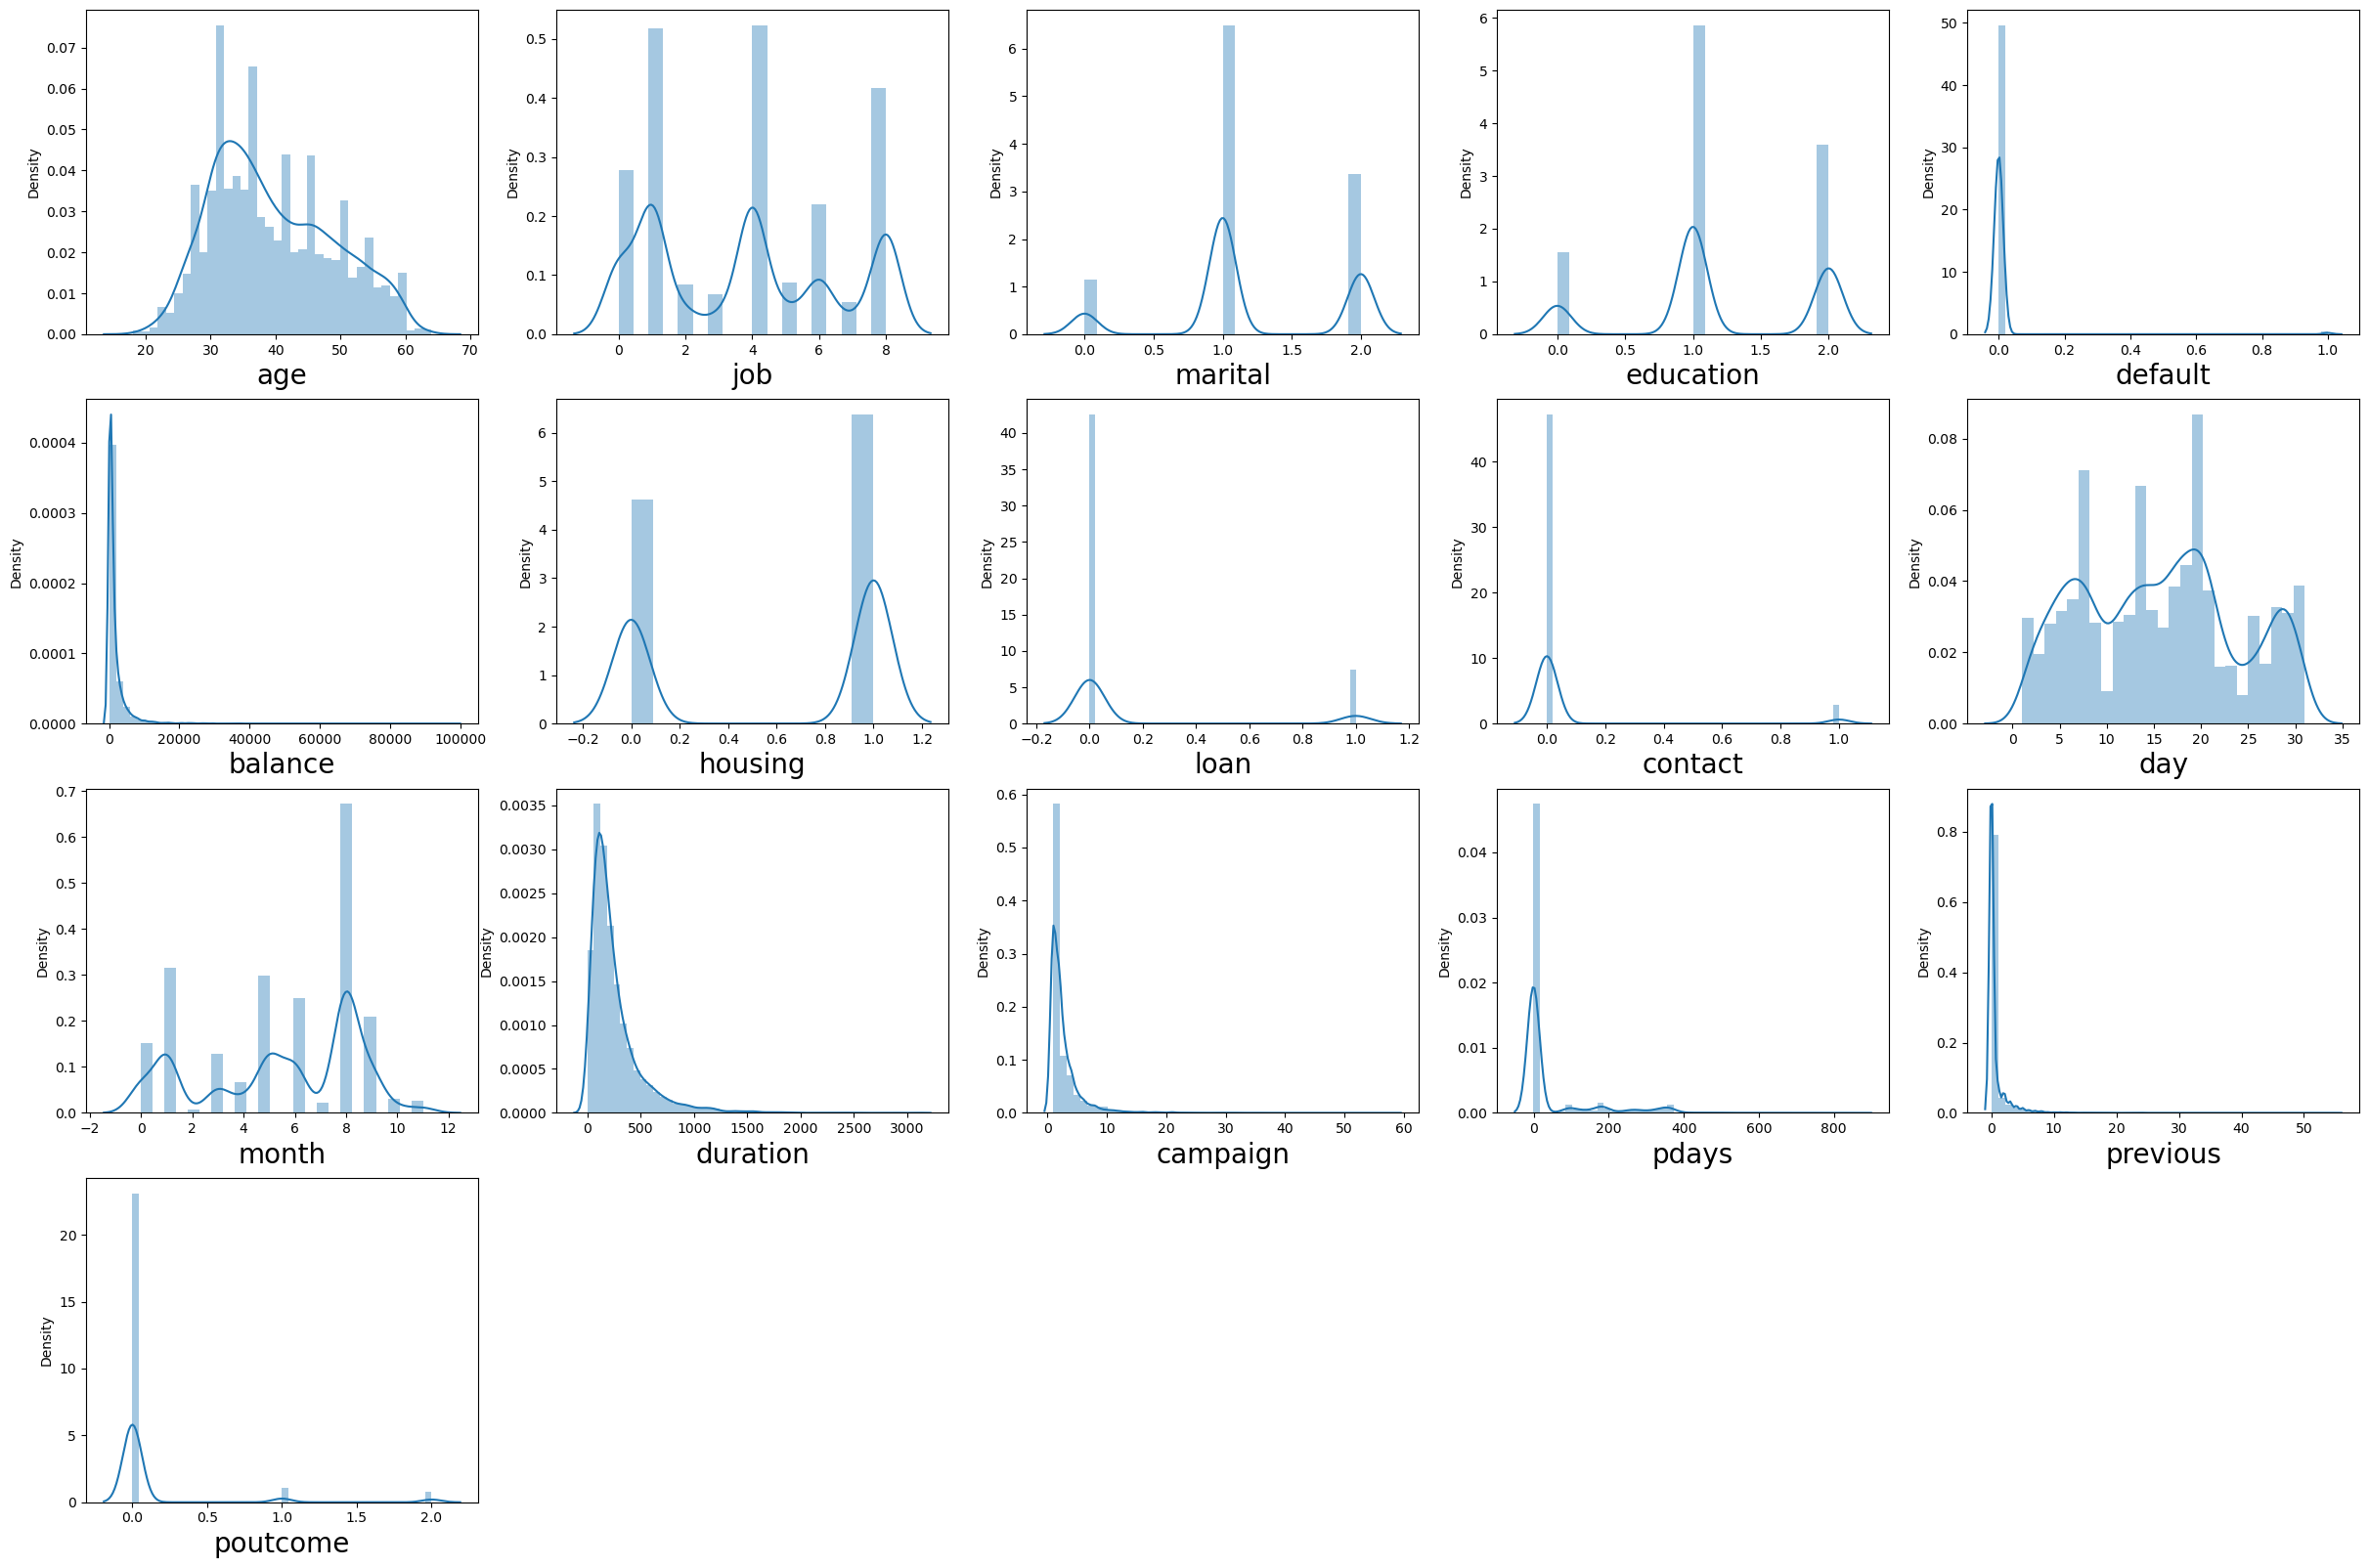

In [167]:
plt.figure(figsize=(30,25))
plotnumber = 1

for i in test:
    if plotnumber<=18:
        plt.subplot(5,5,plotnumber)
        sns.distplot(test[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show() 

In [171]:
numric_Data = test[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]

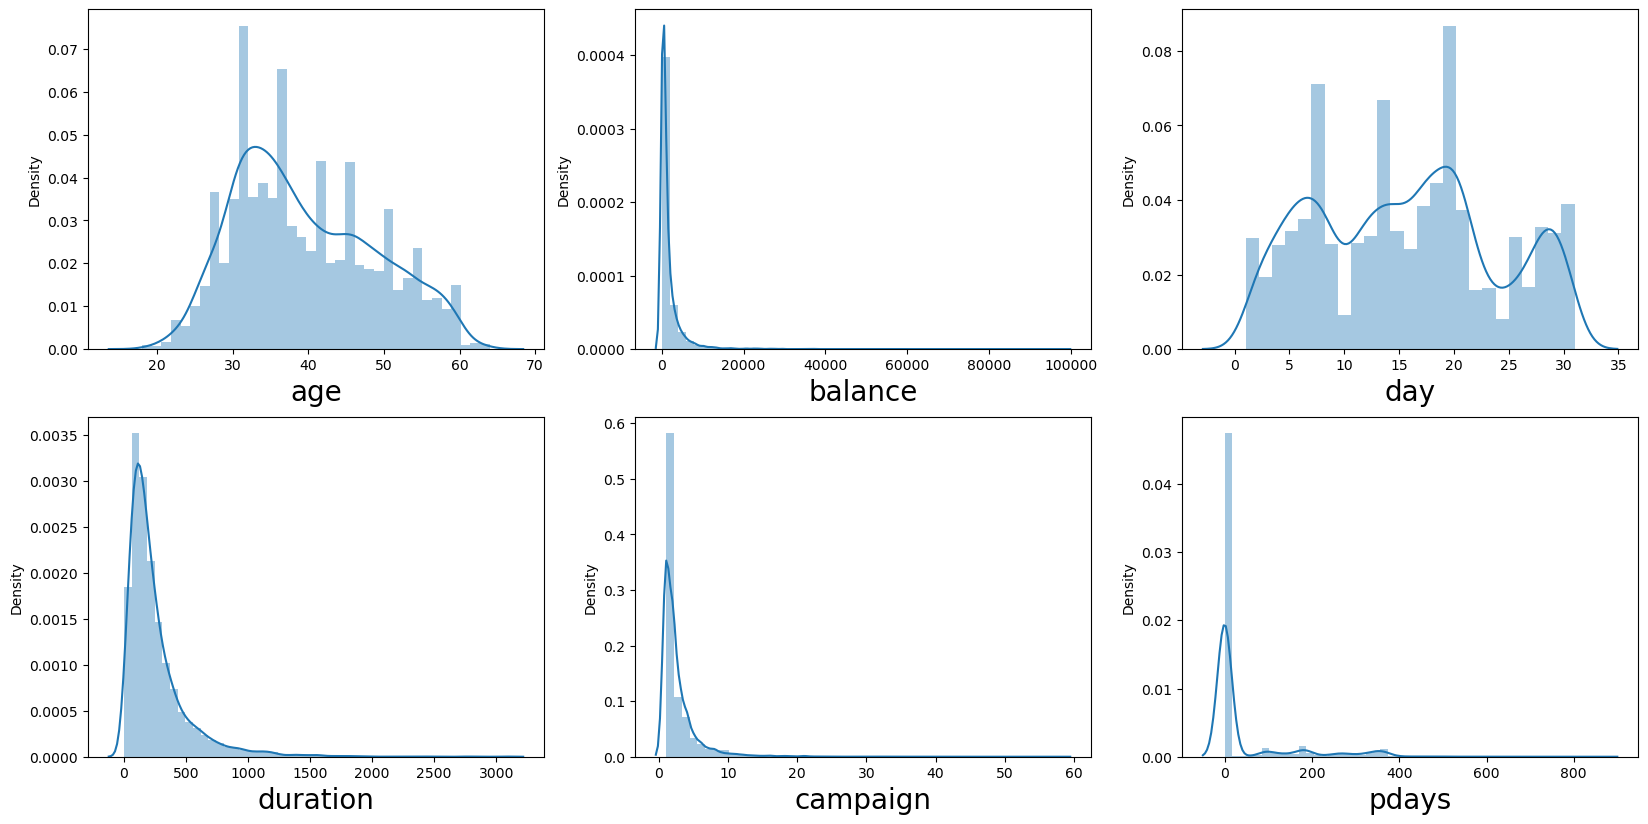

In [169]:
plt.figure(figsize=(20,15))
plotnumber = 1
 
for i in numric_Data:
    if plotnumber<=6:
        plt.subplot(3,3,plotnumber)
        sns.distplot(numric_Data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

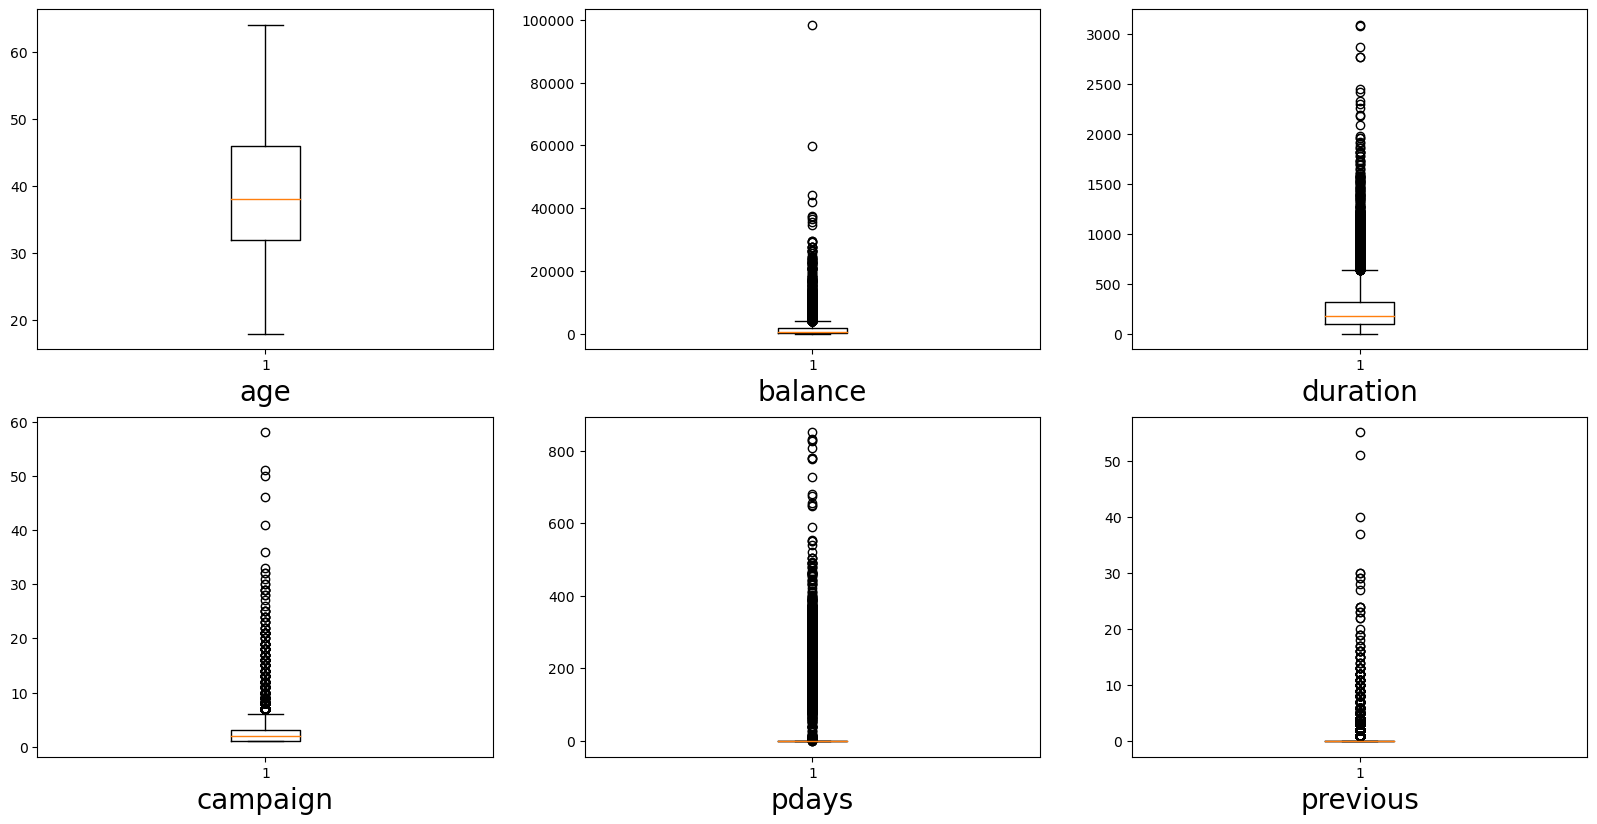

In [173]:
 plt.figure(figsize=(20,15))
plotnumber = 1
 
for i in numric_Data:
    if plotnumber<=6:
        plt.subplot(3,3,plotnumber)
        plt.boxplot(numric_Data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

In [174]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [175]:
test['balance'] = pt.fit_transform(test[['balance']])
test['duration'] = pt.fit_transform(test[['duration']])
test['campaign'] = pt.fit_transform(test[['campaign']])
test['pdays'] = pt.fit_transform(test[['pdays']])

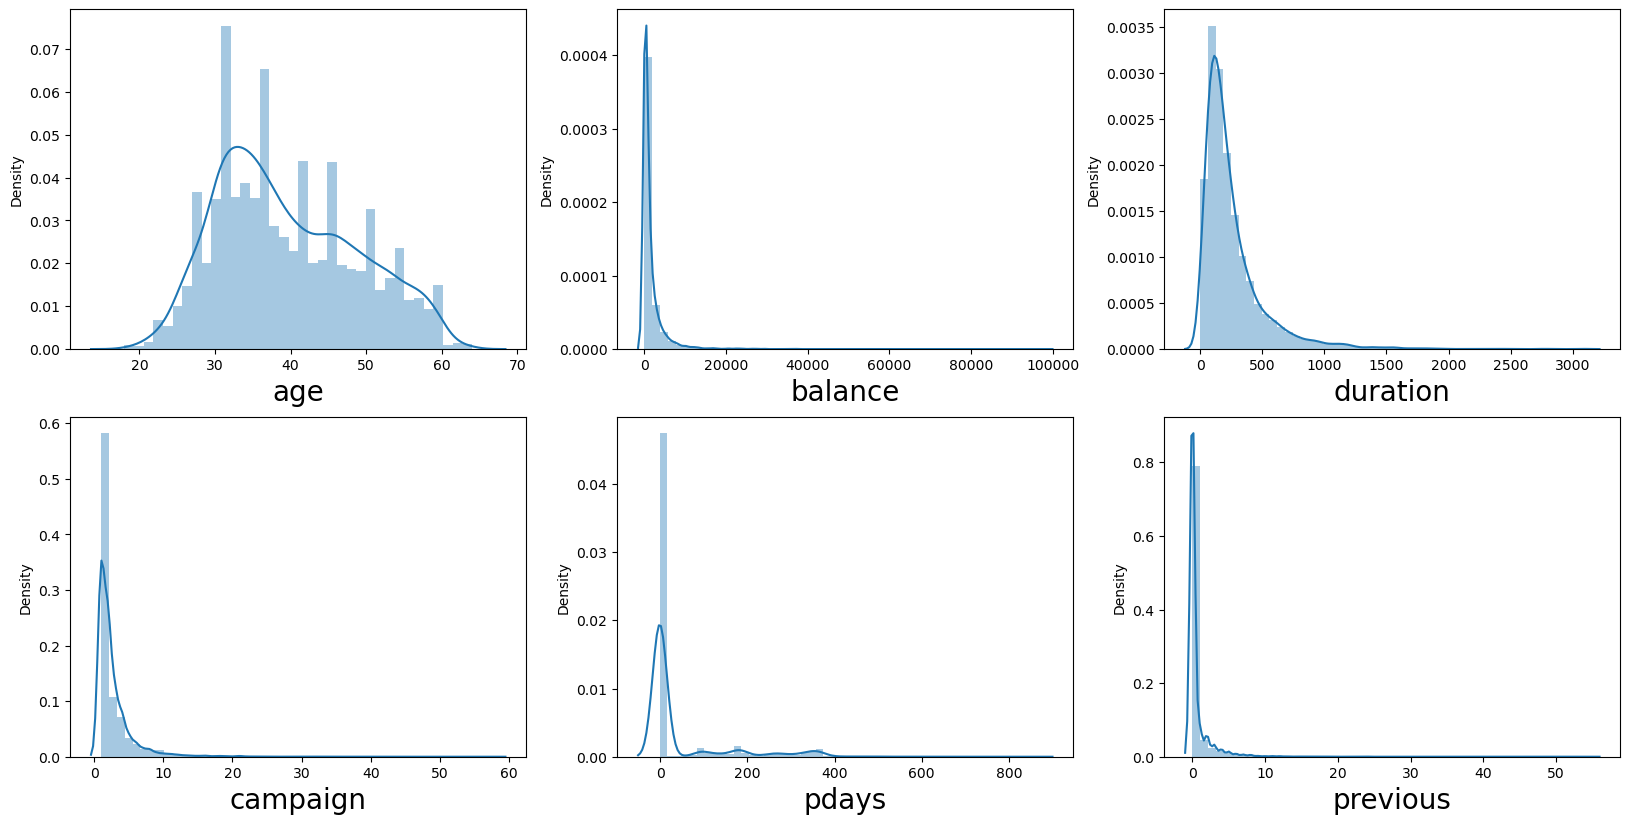

In [177]:
plt.figure(figsize=(20,15))
plotnumber = 1
 
for i in numric_Data:
    if plotnumber<=6:
        plt.subplot(3,3,plotnumber)
        sns.distplot(numric_Data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

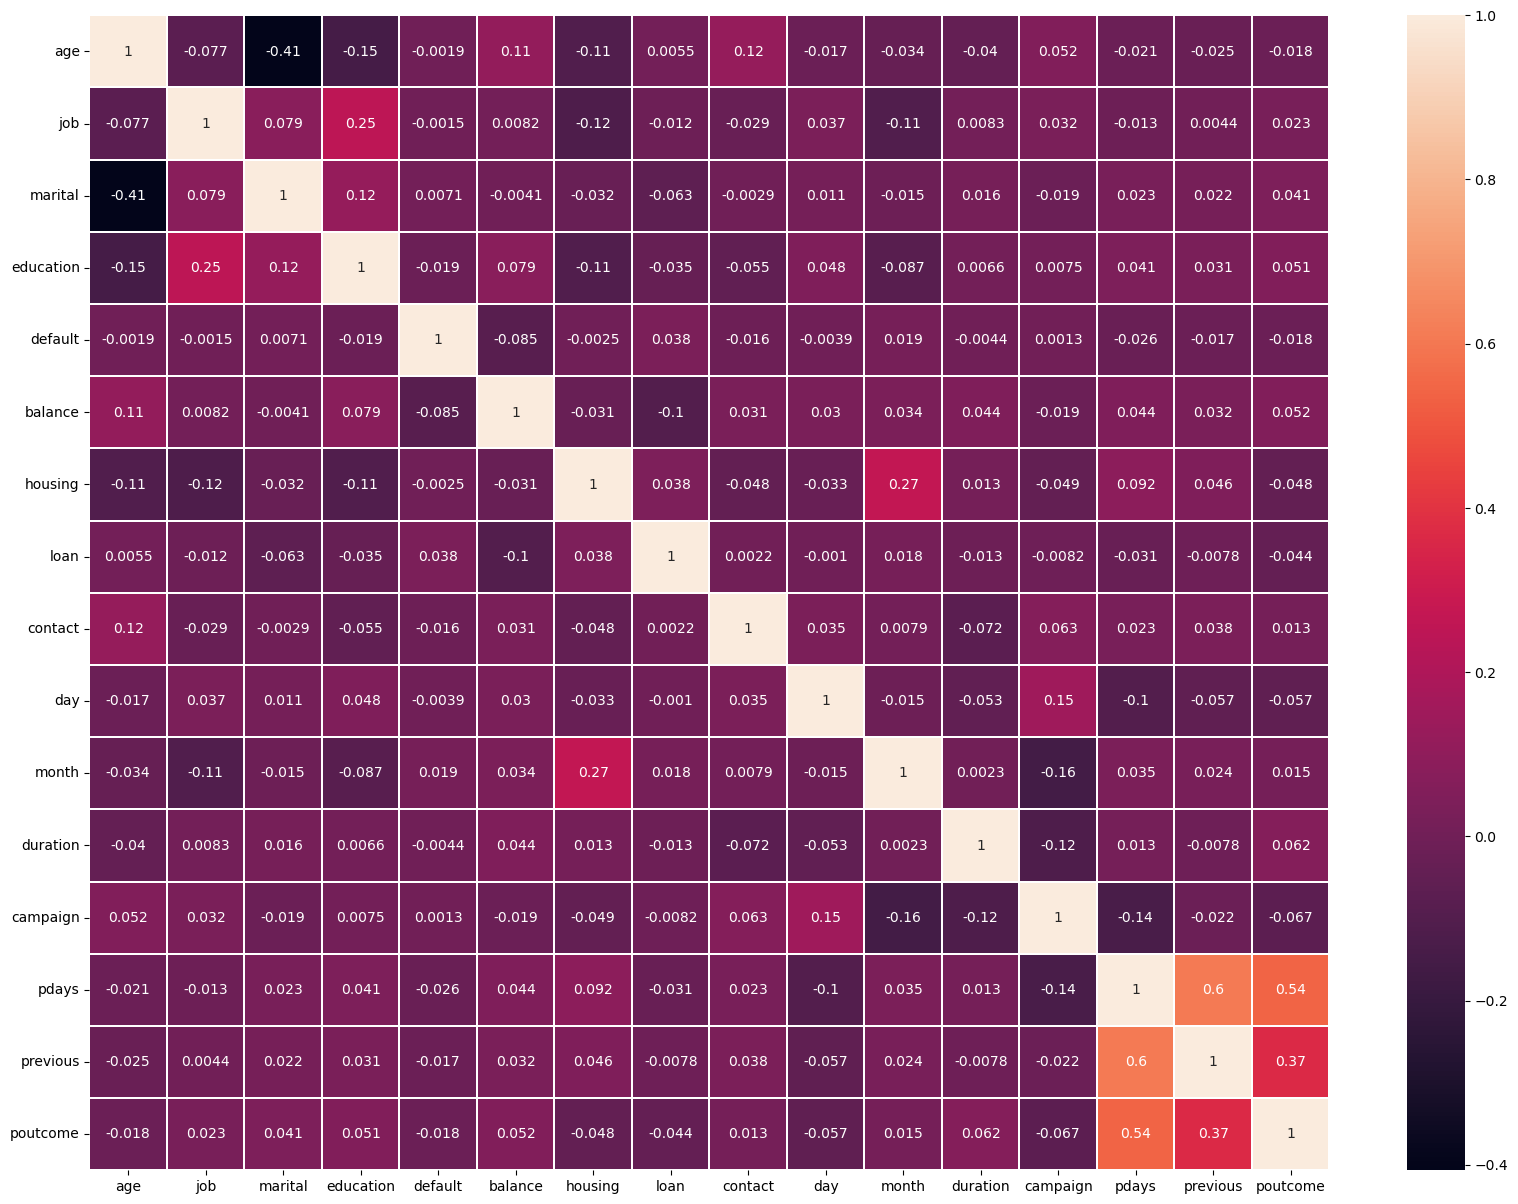

In [178]:
# check multicplinearty problem usinig heatmap
plt.figure(figsize=(20,15))
sns.heatmap(test.corr(),linewidths=0.1,annot=True)
plt.yticks(rotation=0)
plt.show()

In [179]:
from sklearn.preprocessing import StandardScaler   
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [180]:
scaled = StandardScaler()
Scal = pd.DataFrame(scaled.fit_transform(test),columns=test.columns)

In [181]:
# finding variance inflaction factor for each column
vif = []
for i in range(Scal.shape[1]):
    X = variance_inflation_factor(Scal,i)
    vif.append(X)

In [182]:
VIF = pd.DataFrame()
VIF['vif'] = vif 
VIF['feature'] = test.columns
VIF

vif    feature
0   1.285624        age
1   1.088150        job
2   1.221521    marital
3   1.120527  education
4   1.009869    default
5   1.049989    balance
6   1.139849    housing
7   1.018539       loan
8   1.031792    contact
9   1.039160        day
10  1.116302      month
11  1.027613   duration
12  1.090701   campaign
13  2.017817      pdays
14  1.594459   previous
15  1.449574   poutcome

In [183]:
test.drop('default',axis=1,inplace=True)
test.drop('contact',axis=1,inplace=True)

In [184]:
KNN =  KNeighborsClassifier(n_neighbors=1,algorithm='ball_tree',leaf_size=7)
KNN.fit(X_train,Y_train)
KNN_pred = KNN.predict(test)

In [185]:
import pickle
filename = 'test.pkl'
pickle.dump(KNN, open(filename,'wb'))

In [186]:
Loded = pickle.load(open('test.pkl','rb'))
Loded.score(x_test,y_test)

0.8423781541652264

In [187]:
KNN_pred.shape

(9987,)

In [188]:
test.shape

(9987, 14)